In [1]:
#import necessary libraries
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wbcc            294 non-null    float64
 17  rbcc            269 non-null    flo

In [6]:
# finding the categorical and numerical attributes

cat_cols=[col for col in df.columns if df[col].dtype=='object']
num_cols=[col for col in df.columns if df[col].dtype!='object']


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'sg'}>,
        <AxesSubplot:title={'center':'al'}>],
       [<AxesSubplot:title={'center':'su'}>,
        <AxesSubplot:title={'center':'bgr'}>,
        <AxesSubplot:title={'center':'bu'}>,
        <AxesSubplot:title={'center':'sc'}>],
       [<AxesSubplot:title={'center':'sod'}>,
        <AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'hemo'}>,
        <AxesSubplot:title={'center':'pcv'}>],
       [<AxesSubplot:title={'center':'wbcc'}>,
        <AxesSubplot:title={'center':'rbcc'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

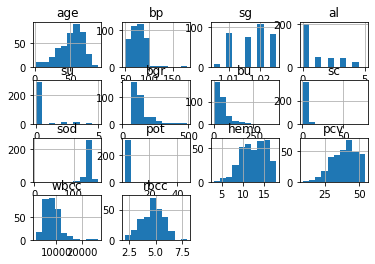

In [7]:
df.hist(column=num_cols)

In [8]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' nan] values

cad has ['no' 'yes' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [9]:
df['dm'].replace(to_replace={'\tno':'no',' yes':'yes','\tyes':'yes','yes':'yes'},inplace=True)

df['cad']=df['cad'].replace(to_replace='\tno',value='no')

df['classification']=df['classification'].replace(to_replace={'ckd\t':"ckd","ckd":'ckd','notckd':'not ckd'})

In [10]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' nan] values

cad has ['no' 'yes' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'not ckd'] values



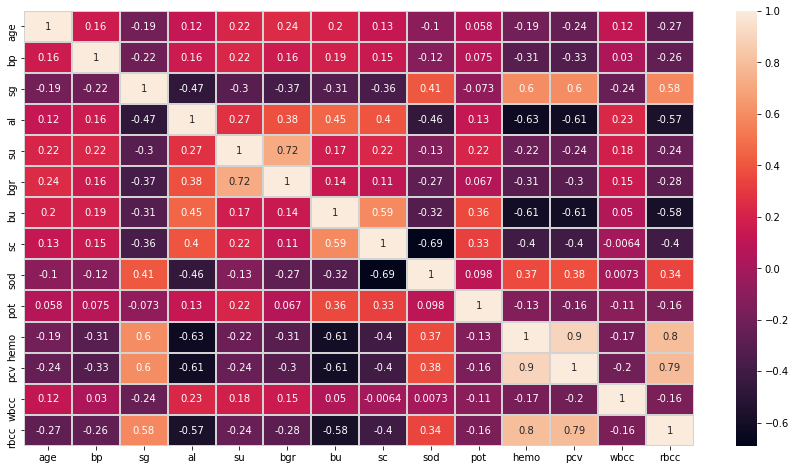

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='lightgrey')
plt.show()

In [12]:
df.isna().sum().sort_values(ascending=False)

rbc               152
rbcc              131
wbcc              106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
df[num_cols].isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wbcc    106
rbcc    131
dtype: int64

In [14]:
df[cat_cols].isnull().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [15]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [16]:

for col in num_cols:
    random_value_imputation(col)

In [17]:
df[num_cols].isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wbcc    0
rbcc    0
dtype: int64

In [18]:
for col in cat_cols:
    impute_mode(col)

In [19]:
df[cat_cols].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [20]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

classification has 2 categories



In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,107.0,...,38.0,6000.0,4.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,6.1,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [76]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

X = df[ind_col]
y = df[dep_col]


In [23]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50,random_state=0)


In [24]:
from sklearn.metrics import precision_score,f1_score,recall_score,roc_auc_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [25]:
#ss = StandardScaler()
#ss.fit(X_train)
#X_train = ss.transform(X_train)
#X_test = ss.transform(X_test)


In [26]:
F_measures=[]

def Evaluate(Y_Test, Predictions) :
    '''
    
    Performs Evaluation of Classification Model
    
    Compares Y_Test and Prediction made by the Model
    
    Returns Classification Evaluation Metrics.
    
    Parameters 
    
    ----------
    
    Y_Test : also known as Y_True, Actual Labels of X_Test Data Set used to Compare with the Predictions.
    
    Predictions : Y_Prediction, Predictions made by Classification Model. 
    
    '''
    
   
    Accuracy = accuracy_score(Y_Test, Predictions)
    
    Precision = precision_score(Y_Test, Predictions)
    
    Recall = recall_score(Y_Test, Predictions)
    
    F1 = f1_score(Y_Test, Predictions)
    Auc=roc_auc_score(Y_Test,Predictions)
    Gini=2*(Auc)-1
    Metric = {'Accuracy Score' : round(Accuracy,2), 
              
              'Precision Score' : round(Precision,2),
              
              'Recall Score' : round(Recall,2),
              
              'F1 Score' : round(F1,2),
              'AUC'  :  round(Auc,2),
              'GINI': round(Gini,2)
             }
    
    print(f'Accuracy Score : {Accuracy * 100:.2f}%')
    
    print(f'Precision Score : {Precision * 100:.2f}%')
    
    print(f'Recall Score : {Recall * 100:.2f}%')
    
    print(f'F1 Score : {F1 * 100:.2f}%')
    
    print(f'AUC :{Auc*100:2f}%')
    
    print(f'GINI :{Gini}%')
    
    return Metric

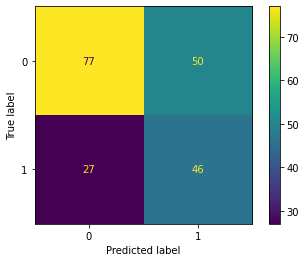

Accuracy Score : 61.50%
Precision Score : 47.92%
Recall Score : 63.01%
F1 Score : 54.44%
AUC :61.821810%
GINI :0.23643619889979495%


'knn_acc=accuracy_score(Y_pred_knn,y_test)*100\nprint("Confusion Matrix: ",cm)\nprint("KNN accuracy    : ",knn_acc)\nprint("KNN precision   : ",precision_score(Y_pred_knn,y_test)*100)\nprint("KNN f1 score    : ",f1_score(Y_pred_knn,y_test)*100)\nprint("KNN recall      : ",recall_score(Y_pred_knn,y_test)*100)\nprint("KNN auc         : ",roc_auc_score(Y_pred_knn,y_test)*100)\nprint("Gini Coefficient: ",2*roc_auc_score(Y_pred_knn,y_test)-1)'

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( algorithm='ball_tree',leaf_size=25,n_neighbors= 5,p= 2,weights='uniform')
knn.fit(X_train,y_train)
'''params = {
    "n_neighbors":[3,5,7,9,10,15,20],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}

gs = GridSearchCV(knn, param_grid=params)
model = gs.fit(X_train,y_train)'''
Y_pred_knn = knn.predict(X_test)
#accuracy_score(y_test, preds)

cm=confusion_matrix(y_test,Y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

Knn_metric=Evaluate(y_test,Y_pred_knn)
'''knn_acc=accuracy_score(Y_pred_knn,y_test)*100
print("Confusion Matrix: ",cm)
print("KNN accuracy    : ",knn_acc)
print("KNN precision   : ",precision_score(Y_pred_knn,y_test)*100)
print("KNN f1 score    : ",f1_score(Y_pred_knn,y_test)*100)
print("KNN recall      : ",recall_score(Y_pred_knn,y_test)*100)
print("KNN auc         : ",roc_auc_score(Y_pred_knn,y_test)*100)
print("Gini Coefficient: ",2*roc_auc_score(Y_pred_knn,y_test)-1)'''


In [28]:
#gs.best_params_

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       127
           1       0.99      0.92      0.95        73

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.97      0.96      0.96       200



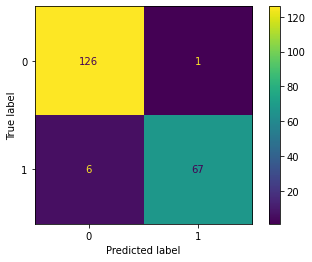

Accuracy Score : 96.50%
Precision Score : 98.53%
Recall Score : 91.78%
F1 Score : 95.04%
AUC :95.496710%
GINI :0.9099342034300508%


In [29]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

'''rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
'''
Y_pred_rf=rd_clf.predict(X_test)
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")
cm=confusion_matrix(y_test,Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rd_clf.classes_)
disp.plot()
plt.show()

'''RF_acc=accuracy_score(Y_pred_rf,y_test)*100
print("Confusion Matrix              : \n",cm)
print("Random Forest accuracy        : ",RF_acc)
print("Random Forest precision       : ",precision_score(Y_pred_rf,y_test)*100)
print("Random Forest f1 score        : ",f1_score(Y_pred_rf,y_test)*100)
print("Random Forest recall          : ",recall_score(Y_pred_rf,y_test)*100)
print("Random Forest auc             : ",roc_auc_score(Y_pred_rf,y_test)*100)
print("Random Forest  Gini Coefficient:",2*roc_auc_score(Y_pred_rf,y_test)-1)'''

RF_metric=Evaluate(y_test,Y_pred_rf)

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       127
           1       0.89      0.96      0.92        73

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



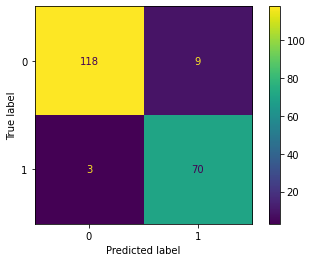

Accuracy Score : 94.00%
Precision Score : 88.61%
Recall Score : 95.89%
F1 Score : 92.11%
AUC :94.401898%
GINI :0.8880379678567576%


In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)


Y_pred_lr=logreg.predict(X_test)
# accuracy score, confusion matrix and classification report of log_reg
print(f"Classification Report :- \n {classification_report(y_test, logreg.predict(X_test))}")
cm=confusion_matrix(y_test,Y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()
plt.show()
log_acc=accuracy_score(Y_pred_lr,y_test)*100

'''
print("Confusion Matrix                    : \n",cm)
print("LogisticRegression accuracy         : ",log_acc)
print("LogisticRegression precision        : ",precision_score(Y_pred_lr,y_test)*100)
print("LogisticRegression f1 score         : ",f1_score(Y_pred_lr,y_test)*100)
print("LogisticRegression recall           : ",recall_score(Y_pred_lr,y_test)*100)
print("LogisticRegression auc              : ",roc_auc_score(Y_pred_lr,y_test)*100)
print("LogisticRegression  Gini Coefficient:",2*roc_auc_score(Y_pred_lr,y_test)-1)'''

Log_metric=Evaluate(y_test,Y_pred_lr)

In [31]:
from sklearn.svm import LinearSVC

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       127
           1       0.83      0.89      0.86        73

    accuracy                           0.90       200
   macro avg       0.88      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



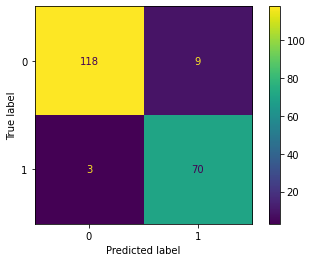

Accuracy Score : 89.50%
Precision Score : 83.33%
Recall Score : 89.04%
F1 Score : 86.09%
AUC :89.402438%
GINI :0.7880487541797001%


In [32]:
import warnings
warnings.filterwarnings("ignore")

LSVM_L2=LinearSVC(penalty='l2',max_iter=100000)
LSVM_L2.fit(X_train,y_train)
Y_pred_l2 = LSVM_L2.predict(X_test)

print(f"Classification Report :- \n {classification_report(y_test, LSVM_L2.predict(X_test))}")
cm=confusion_matrix(y_test,Y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LSVM_L2.classes_)
disp.plot()
plt.show()

lsvm_l2_acc=accuracy_score(Y_pred_l2,y_test)*100

'''
print("Confusion Matrix                 : \n",cm)
print("LSVM Penalty-L2 accuracy         : ",lsvm_l2_acc)
print("LSVM Penalty-L2 precision        : ",precision_score(Y_pred_l2,y_test)*100)
print("LSVM Penalty-L2 f1 score         : ",f1_score(Y_pred_l2,y_test)*100)
print("LSVM Penalty-L2 recall           : ",recall_score(Y_pred_l2,y_test)*100)
print("LSVM Penalty-L2 auc              : ",roc_auc_score(Y_pred_l2,y_test)*100)
print("LSVM Penalty-L2 Gini Coefficient :",2*roc_auc_score(Y_pred_l2,y_test)-1)
'''

LSVM_L2_metric=Evaluate(y_test,Y_pred_l2)


Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       127
           1       0.88      0.97      0.92        73

    accuracy                           0.94       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.94      0.94      0.94       200



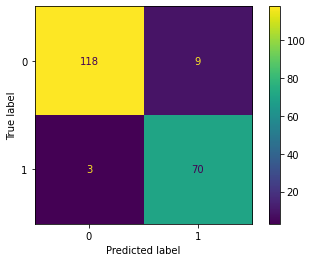

Accuracy Score : 94.00%
Precision Score : 87.65%
Recall Score : 97.26%
F1 Score : 92.21%
AUC :94.693129%
GINI :0.8938625822457122%


In [33]:
LSVM_L1=LinearSVC(penalty='l1',loss="squared_hinge", dual=False, tol=1e-3)
LSVM_L1.fit(X_train,y_train)


Y_pred_l1 = LSVM_L1.predict(X_test)
print(f"Classification Report :- \n {classification_report(y_test, LSVM_L1.predict(X_test))}")
cm=confusion_matrix(y_test,Y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LSVM_L1.classes_)
disp.plot()
plt.show()
lsvm_l1_acc=accuracy_score(Y_pred_l1,y_test)*100

'''
print("Confusion Matrix                 : \n",cm)
print("LSVM Penalty-L1 accuracy         : ",lsvm_l1_acc)
print("LSVM Penalty-L1 precision        : ",precision_score(Y_pred_l1,y_test)*100)
print("LSVM Penalty-L1 f1 score         : ",f1_score(Y_pred_l1,y_test)*100)
print("LSVM Penalty-L1 recall           : ",recall_score(Y_pred_l1,y_test)*100)
print("LSVM Penalty-L1 auc              : ",roc_auc_score(Y_pred_l1,y_test)*100)
print("LSVM Penalty-L1 Gini Coefficient :",2*roc_auc_score(Y_pred_l1,y_test)-1)
'''

LSVM_L1_metric=Evaluate(y_test,Y_pred_l1)

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       127
           1       0.99      0.92      0.95        73

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.97      0.96      0.96       200



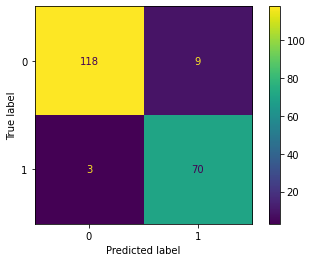

Accuracy Score : 96.50%
Precision Score : 98.53%
Recall Score : 91.78%
F1 Score : 95.04%
AUC :95.496710%
GINI :0.9099342034300508%


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
#Y_pred=dt.predict(X_test)

'''dt_acc = accuracy_score(y_test, dt.predict(X_test))

print(f"Training Accuracy of C5.0 is {accuracy_score(y_train, dt.predict(X_train))}")
print(f"Test Accuracy of C5.0 is {dt_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dt.predict(X_test))}\n")'''
Y_pred_dt=dt.predict(X_test)
print(f"Classification Report :- \n {classification_report(y_test, dt.predict(X_test))}")

cm=confusion_matrix(y_test,Y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
plt.show()

c50_acc=accuracy_score(Y_pred_dt,y_test)*100
'''
print("Confusion Matrix      : \n",cm)
print("C5.0 accuracy         : ",c50_acc)
print("C5.0 precision        : ",precision_score(Y_pred_dt,y_test)*100)
print("C5.0 f1 score         : ",f1_score(Y_pred_dt,y_test)*100)
print("C5.0 recall           : ",recall_score(Y_pred_dt,y_test)*100)
print("C5.0 auc              : ",roc_auc_score(Y_pred_dt,y_test)*100)
print("C5.0 Gini Coefficient :",2*roc_auc_score(Y_pred_dt,y_test)-1)
'''
C50_metric=Evaluate(y_test,Y_pred_dt)

In [35]:
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [36]:
import keras as k
from keras.layers import Dropout

In [37]:
model_S = Sequential()

# Adding the input layer and the first hidden layer
model_S.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
model_S.add(Dropout(rate = 0.1))

# Adding the second hidden layer
model_S.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))

# Adding the third hidden layer
model_S.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))


# Adding the output layer
model_S.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model_S.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_S.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                800       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [38]:
history = model_S.fit(X_train,y_train,epochs=250,batch_size=10,verbose=2,validation_split=0.5)

Epoch 1/250
10/10 - 4s - loss: 0.6717 - accuracy: 0.5900 - val_loss: 0.6713 - val_accuracy: 0.5900 - 4s/epoch - 353ms/step
Epoch 2/250
10/10 - 0s - loss: 0.6286 - accuracy: 0.6300 - val_loss: 0.6966 - val_accuracy: 0.5900 - 152ms/epoch - 15ms/step
Epoch 3/250
10/10 - 0s - loss: 0.6507 - accuracy: 0.6400 - val_loss: 0.6860 - val_accuracy: 0.5900 - 140ms/epoch - 14ms/step
Epoch 4/250
10/10 - 0s - loss: 0.6324 - accuracy: 0.6400 - val_loss: 0.6759 - val_accuracy: 0.5900 - 153ms/epoch - 15ms/step
Epoch 5/250
10/10 - 0s - loss: 0.6317 - accuracy: 0.6400 - val_loss: 0.6882 - val_accuracy: 0.5900 - 146ms/epoch - 15ms/step
Epoch 6/250
10/10 - 0s - loss: 0.6296 - accuracy: 0.6400 - val_loss: 0.6748 - val_accuracy: 0.5900 - 166ms/epoch - 17ms/step
Epoch 7/250
10/10 - 0s - loss: 0.6454 - accuracy: 0.6400 - val_loss: 0.6735 - val_accuracy: 0.5900 - 149ms/epoch - 15ms/step
Epoch 8/250
10/10 - 0s - loss: 0.6502 - accuracy: 0.6400 - val_loss: 0.6727 - val_accuracy: 0.5900 - 151ms/epoch - 15ms/step
Ep

Epoch 67/250
10/10 - 0s - loss: 0.4049 - accuracy: 0.7800 - val_loss: 0.3415 - val_accuracy: 0.8600 - 163ms/epoch - 16ms/step
Epoch 68/250
10/10 - 0s - loss: 0.4054 - accuracy: 0.8200 - val_loss: 0.2978 - val_accuracy: 0.8900 - 169ms/epoch - 17ms/step
Epoch 69/250
10/10 - 0s - loss: 0.4062 - accuracy: 0.8300 - val_loss: 0.3685 - val_accuracy: 0.7800 - 169ms/epoch - 17ms/step
Epoch 70/250
10/10 - 0s - loss: 0.4202 - accuracy: 0.8200 - val_loss: 0.3917 - val_accuracy: 0.8400 - 163ms/epoch - 16ms/step
Epoch 71/250
10/10 - 0s - loss: 0.4929 - accuracy: 0.7600 - val_loss: 0.4151 - val_accuracy: 0.7500 - 193ms/epoch - 19ms/step
Epoch 72/250
10/10 - 0s - loss: 0.4431 - accuracy: 0.8000 - val_loss: 0.3584 - val_accuracy: 0.8900 - 146ms/epoch - 15ms/step
Epoch 73/250
10/10 - 0s - loss: 0.4018 - accuracy: 0.8300 - val_loss: 0.3123 - val_accuracy: 0.9000 - 131ms/epoch - 13ms/step
Epoch 74/250
10/10 - 0s - loss: 0.3783 - accuracy: 0.8100 - val_loss: 0.4261 - val_accuracy: 0.7600 - 139ms/epoch - 14

Epoch 132/250
10/10 - 0s - loss: 0.3725 - accuracy: 0.7900 - val_loss: 0.2631 - val_accuracy: 0.8900 - 166ms/epoch - 17ms/step
Epoch 133/250
10/10 - 0s - loss: 0.3528 - accuracy: 0.8400 - val_loss: 0.2511 - val_accuracy: 0.8900 - 160ms/epoch - 16ms/step
Epoch 134/250
10/10 - 0s - loss: 0.3408 - accuracy: 0.8500 - val_loss: 0.2730 - val_accuracy: 0.8600 - 148ms/epoch - 15ms/step
Epoch 135/250
10/10 - 0s - loss: 0.2997 - accuracy: 0.8600 - val_loss: 0.2500 - val_accuracy: 0.8800 - 181ms/epoch - 18ms/step
Epoch 136/250
10/10 - 0s - loss: 0.3050 - accuracy: 0.8400 - val_loss: 0.3401 - val_accuracy: 0.8100 - 136ms/epoch - 14ms/step
Epoch 137/250
10/10 - 0s - loss: 0.3323 - accuracy: 0.8300 - val_loss: 0.2880 - val_accuracy: 0.8600 - 133ms/epoch - 13ms/step
Epoch 138/250
10/10 - 0s - loss: 0.3423 - accuracy: 0.8200 - val_loss: 0.2440 - val_accuracy: 0.8900 - 131ms/epoch - 13ms/step
Epoch 139/250
10/10 - 0s - loss: 0.3357 - accuracy: 0.8300 - val_loss: 0.2485 - val_accuracy: 0.8900 - 124ms/ep

Epoch 197/250
10/10 - 0s - loss: 0.3687 - accuracy: 0.8500 - val_loss: 0.3560 - val_accuracy: 0.8300 - 195ms/epoch - 20ms/step
Epoch 198/250
10/10 - 0s - loss: 0.3752 - accuracy: 0.8400 - val_loss: 0.3581 - val_accuracy: 0.8200 - 269ms/epoch - 27ms/step
Epoch 199/250
10/10 - 0s - loss: 0.3916 - accuracy: 0.8500 - val_loss: 0.3330 - val_accuracy: 0.8900 - 207ms/epoch - 21ms/step
Epoch 200/250
10/10 - 0s - loss: 0.3671 - accuracy: 0.8400 - val_loss: 0.3410 - val_accuracy: 0.8600 - 219ms/epoch - 22ms/step
Epoch 201/250
10/10 - 0s - loss: 0.3846 - accuracy: 0.8200 - val_loss: 0.3519 - val_accuracy: 0.8200 - 186ms/epoch - 19ms/step
Epoch 202/250
10/10 - 0s - loss: 0.3772 - accuracy: 0.8300 - val_loss: 0.3391 - val_accuracy: 0.9000 - 200ms/epoch - 20ms/step
Epoch 203/250
10/10 - 0s - loss: 0.3569 - accuracy: 0.8200 - val_loss: 0.4170 - val_accuracy: 0.7400 - 202ms/epoch - 20ms/step
Epoch 204/250
10/10 - 0s - loss: 0.3819 - accuracy: 0.8100 - val_loss: 0.3245 - val_accuracy: 0.9000 - 176ms/ep

In [39]:
yp = model_S.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

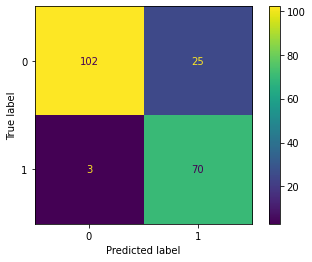

Accuracy Score : 86.00%
Precision Score : 73.68%
Recall Score : 95.89%
F1 Score : 83.33%
AUC :88.102686%
GINI :0.7620537158882537%


In [40]:

cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
plt.show()
Ann_acc=accuracy_score(y_pred,y_test)*100

'''
print("Confusion Matrix     : \n",cm)
print("ANN accuracy         : ",Ann_acc)
print("ANN precision        : ",precision_score(y_pred,y_test)*100)
print("ANN f1 score         : ",f1_score(y_pred,y_test)*100)
print("ANN recall           : ",recall_score(y_pred,y_test)*100)
print("ANN auc              : ",roc_auc_score(y_pred,y_test)*100)
print("ANN Gini Coefficient :",2*roc_auc_score(y_pred,y_test)-1)
'''
Ann_metric=Evaluate(y_test,y_pred)

In [41]:
from chefboost import Chefboost as cb

In [42]:
df_train=pd.concat([X_train,y_train],axis=1)

df_test=pd.concat([X_test,y_test],axis=1)



In [43]:
config = {"algorithm": "CHAID"}
tree = cb.fit(df_train,config,target_label='classification')

[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  8.942079544067383  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.0
MSE:  0.0
RMSE:  0.0
RAE:  0.0
RRSE:  0.0
Mean:  0.385
MAE / Mean:  0.0 %
RMSE / Mean:  0.0 %


In [44]:

y_pred=[]
c=0

for i in y_test:
    x1=cb.predict(tree,X_test.iloc[c])
    if x1 > 0.6:
        y_pred.append(1)
    else:
        y_pred.append(0)
    c=c+1

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       127
           1       0.99      0.92      0.95        73

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.97      0.96      0.96       200



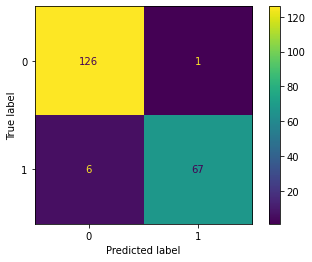

Accuracy Score : 96.50%
Precision Score : 98.53%
Recall Score : 91.78%
F1 Score : 95.04%
AUC :95.496710%
GINI :0.9099342034300508%


In [45]:
print(classification_report(y_test,y_pred))


cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
chaid_acc=accuracy_score(y_pred,y_test)*100

'''
print("Confusion Matrix     : \n",cm)
print("chaid accuracy         : ",chaid_acc)
print("chaid precision        : ",precision_score(y_pred,y_test)*100)
print("chaid f1 score         : ",f1_score(y_pred,y_test)*100)
print("chaid recall           : ",recall_score(y_pred,y_test)*100)
print("chaid auc              : ",roc_auc_score(y_pred,y_test)*100)
print("chaid Gini Coefficient :",2*roc_auc_score(y_pred,y_test)-1)

'''

Chaid_metric=Evaluate(y_test,y_pred)

In [46]:
Metrics=pd.DataFrame({'KNN':Knn_metric,
                       'RF':RF_metric,
                       'LR':Log_metric,
                      'LSVM_L1':LSVM_L1_metric,
                      'LSVM_L2':LSVM_L2_metric,
                      'C50':C50_metric,
                      'CHAID':Chaid_metric,
                      'ANN':Ann_metric
                     })

Metrics.head(6)

,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.62,0.96,0.94,0.94,0.90,0.96,0.96,0.86
Precision Score,0.48,0.99,0.89,0.88,0.83,0.99,0.99,0.74
Recall Score,0.63,0.92,0.96,0.97,0.89,0.92,0.92,0.96
F1 Score,0.54,0.95,0.92,0.92,0.86,0.95,0.95,0.83
AUC,0.62,0.95,0.94,0.95,0.89,0.95,0.95,0.88
GINI,0.24,0.91,0.89,0.89,0.79,0.91,0.91,0.76


<AxesSubplot:title={'center':'Comparison of precision, recall and accuracy for all classifiers without feature selections'}, xlabel='classifiers', ylabel='Performance'>

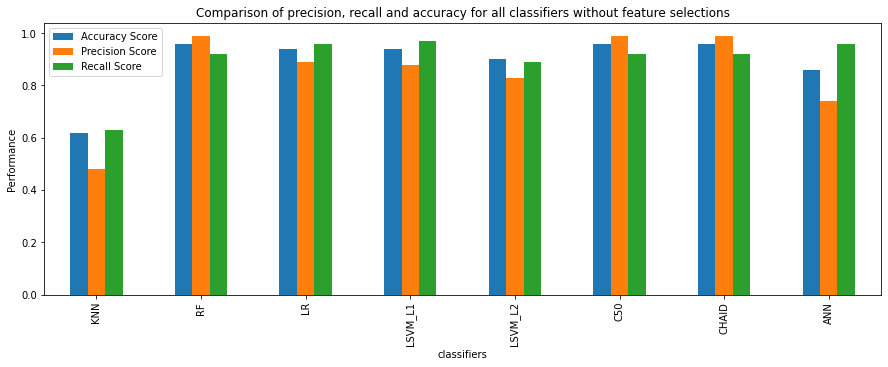

In [47]:
Metrics.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers without feature selections')

<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers without feature selections'}, xlabel='classifiers', ylabel='Performance of F1 score'>

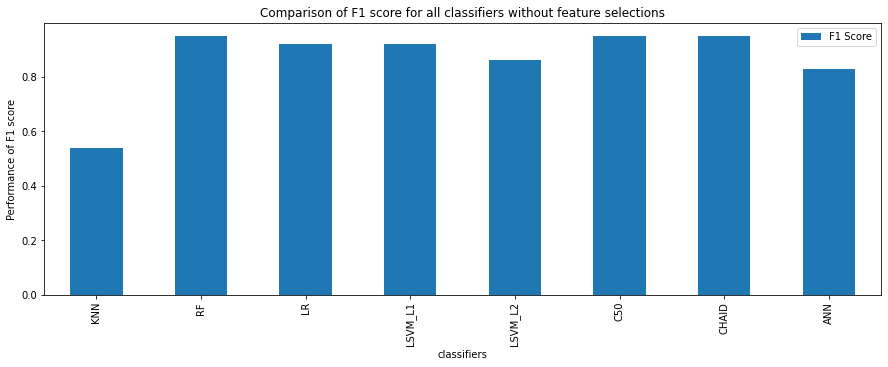

In [48]:
Metrics.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers without feature selections')

Text(0, 0.5, 'AUC')

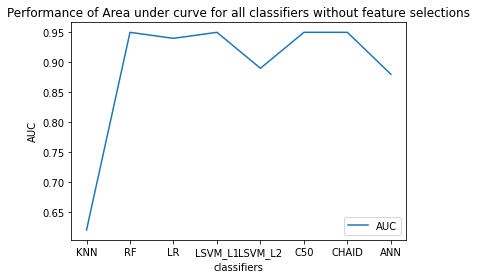

In [50]:
sns.lineplot(data=Metrics.transpose()['AUC'],label='AUC')
plt.title('Performance of Area under curve for all classifiers without feature selections')
plt.xlabel('classifiers')
plt.ylabel('AUC')

Text(0, 0.5, 'GINI Index')

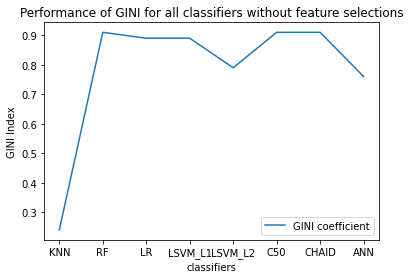

In [51]:
sns.lineplot(data=Metrics.transpose()['GINI'],label='GINI coefficient')
plt.title('Performance of GINI for all classifiers without feature selections')
plt.xlabel('classifiers')
plt.ylabel('GINI Index')

# Forward Feature selection

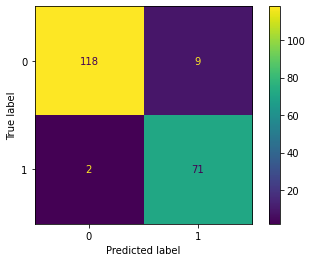

Accuracy Score : 94.50%
Precision Score : 88.75%
Recall Score : 97.26%
F1 Score : 92.81%
AUC :95.086830%
GINI :0.901736597993744%


In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# Sequential Forward Selection(sfs)
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SFS(knn,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)
sfs.fit(X_train,y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
knn.fit(X_train_sfs,y_train)
Y_pred_knn = knn.predict(X_test_sfs)

cm=confusion_matrix(y_test,Y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

Knn_sfs_metric=Evaluate(y_test,Y_pred_knn)

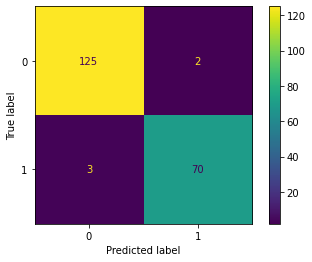

Accuracy Score : 97.50%
Precision Score : 97.22%
Recall Score : 95.89%
F1 Score : 96.55%
AUC :97.157804%
GINI :0.943156078092978%


In [53]:
rd_clf = RandomForestClassifier()

sfs = SFS(rd_clf,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)
sfs.fit(X_train,y_train)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

rd_clf.fit(X_train_sfs,y_train)
Y_pred_rf =rd_clf.predict(X_test_sfs)

cm=confusion_matrix(y_test,Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rd_clf.classes_)
disp.plot()
plt.show()

RF_sfs_metric=Evaluate(y_test,Y_pred_rf)

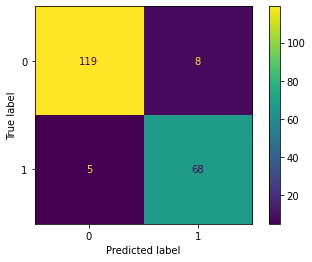

Accuracy Score : 93.50%
Precision Score : 89.47%
Recall Score : 93.15%
F1 Score : 91.28%
AUC :93.425736%
GINI :0.8685147233308164%


In [54]:
logi = LogisticRegression(max_iter=10000)
sfs = SFS(logi,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)
sfs=sfs.fit(X_train,y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
logi.fit(X_train_sfs,y_train)

Y_pred_lr=logi.predict(X_test_sfs)

cm=confusion_matrix(y_test,Y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logi.classes_)
disp.plot()
plt.show()

Log_sfs_metric=Evaluate(y_test,Y_pred_lr)


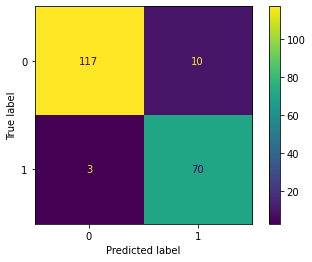

Accuracy Score : 93.50%
Precision Score : 87.50%
Recall Score : 95.89%
F1 Score : 91.50%
AUC :94.008198%
GINI :0.8801639521087259%


In [55]:
clf1=LinearSVC(penalty='l1',loss="squared_hinge", max_iter=10000,C=2,dual=False, tol=1e-2)
sfs = SFS(clf1,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)

sfs=sfs.fit(X_train,y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
clf1.fit(X_train_sfs,y_train)

#clf1.fit(X_train,y_train)

Y_pred_l1=clf1.predict(X_test_sfs)

cm=confusion_matrix(y_test,Y_pred_l1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf1.classes_)
disp.plot()
plt.show()

LSVM1_sfs_metric=Evaluate(y_test,Y_pred_l1)


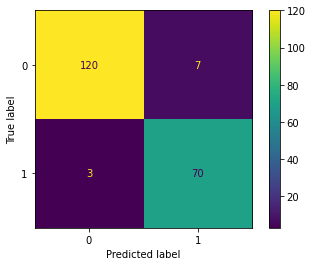

Accuracy Score : 95.00%
Precision Score : 90.91%
Recall Score : 95.89%
F1 Score : 93.33%
AUC :95.189300%
GINI :0.9037859993528203%


In [56]:
clf=LinearSVC(penalty='l2',max_iter=10000,loss="squared_hinge", dual=False, tol=1e-3,C=2)
#clf = SVC(kernel='linear',penalty='l2',C=1)
sfs = SFS(clf,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)
sfs=sfs.fit(X_train,y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
clf.fit(X_train_sfs,y_train)

Y_pred_l2=clf.predict(X_test_sfs)

cm=confusion_matrix(y_test,Y_pred_l2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

LSVM2_sfs_metric=Evaluate(y_test,Y_pred_l2)


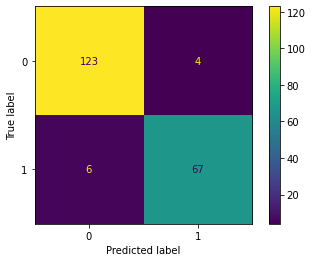

Accuracy Score : 95.00%
Precision Score : 94.37%
Recall Score : 91.78%
F1 Score : 93.06%
AUC :94.315608%
GINI :0.8863121561859564%


In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
# accuracy score, confusion matrix and classification report of DecisionTreeClassifier
sfs = SFS(dt,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)

sfs=sfs.fit(X_train,y_train)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
dt.fit(X_train_sfs,y_train)

Y_pred_dt=dt.predict(X_test_sfs)


cm=confusion_matrix(y_test,Y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
plt.show()

C50_sfs_metric=Evaluate(y_test,Y_pred_dt)


In [58]:
features=['age', 'bp', 'sg', 'al', 'su', 'hemo']
X_cfs=df[features]
Y_cfs=df['classification']
X_train, X_test, y_train, y_test = train_test_split(X_cfs,Y_cfs, test_size = 0.5, random_state = 0)
X_train.shape, X_test.shape

((200, 6), (200, 6))

In [59]:
model_S = Sequential()

# Adding the input layer and the first hidden layer
model_S.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
model_S.add(Dropout(rate = 0.1))

# Adding the second hidden layer
model_S.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))

# Adding the third hidden layer
model_S.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))


# Adding the output layer
model_S.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model_S.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_S.summary()



# opt = keras.optimizers.Adam(learning_rate=0.01)
model_S.fit(X_train, y_train, epochs=100)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                

7/7 [==============================] - 0s 8ms/step - loss: 0.1819 - accuracy: 0.9350
Epoch 71/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2118 - accuracy: 0.9200
Epoch 72/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1782 - accuracy: 0.9550
Epoch 73/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1908 - accuracy: 0.9300
Epoch 74/100
7/7 [==============================] - 0s 12ms/step - loss: 0.1776 - accuracy: 0.9400
Epoch 75/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1973 - accuracy: 0.9450
Epoch 76/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1656 - accuracy: 0.9300
Epoch 77/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1748 - accuracy: 0.9350
Epoch 78/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1895 - accuracy: 0.9250
Epoch 79/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1853 - accuracy: 0.9150
Epoch 80/100
7/7 [=======

In [62]:
yp = model_S.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

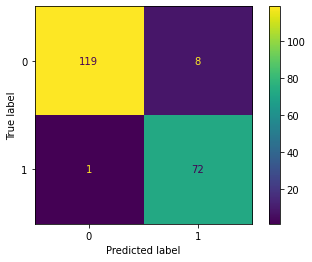

Accuracy Score : 95.50%
Precision Score : 90.00%
Recall Score : 98.63%
F1 Score : 94.12%
AUC :96.165462%
GINI :0.9233092438787616%


In [61]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Ann_sfs_metric=Evaluate(y_test,y_pred)


In [63]:
df_train=pd.concat([X_train,y_train],axis=1)

df_test=pd.concat([X_test,y_test],axis=1)

config = {"algorithm": "CHAID"}
tree = cb.fit(df_train,config,target_label='classification')
y_pred=[]
c=0

for i in y_test:
    x1=cb.predict(tree,X_test.iloc[c])
    if x1 > 0.6:
        y_pred.append(1)
    else:
        y_pred.append(0)
    c=c+1

[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  9.052786111831665  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.025
MSE:  0.0225
RMSE:  0.15
RAE:  0.24174688920761406
RRSE:  0.3082643740285552
Mean:  0.385
MAE / Mean:  6.4935064935064934 %
RMSE / Mean:  38.96103896103896 %


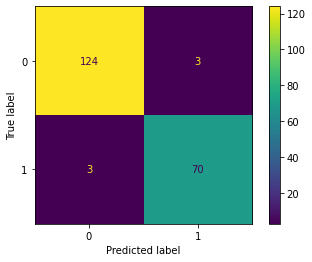

Accuracy Score : 97.00%
Precision Score : 95.89%
Recall Score : 95.89%
F1 Score : 95.89%
AUC :96.764103%
GINI :0.9352820623449465%


In [64]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

chaid_sfs_metric=Evaluate(y_test,y_pred)


In [66]:
Metrics_sfs=pd.DataFrame({'KNN':Knn_sfs_metric,
                       'RF':RF_sfs_metric,
                       'LR':Log_sfs_metric,
                      'LSVM_L1':LSVM1_sfs_metric,
                      'LSVM_L2':LSVM2_sfs_metric,
                      'C50':C50_sfs_metric,
                      'CHAID':chaid_sfs_metric,
                      'ANN':Ann_sfs_metric
                     })

Metrics_sfs.head(6)



,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.94,0.98,0.94,0.94,0.95,0.95,0.97,0.96
Precision Score,0.89,0.97,0.89,0.88,0.91,0.94,0.96,0.90
Recall Score,0.97,0.96,0.93,0.96,0.96,0.92,0.96,0.99
F1 Score,0.93,0.97,0.91,0.92,0.93,0.93,0.96,0.94
AUC,0.95,0.97,0.93,0.94,0.95,0.94,0.97,0.96
GINI,0.90,0.94,0.87,0.88,0.90,0.89,0.94,0.92


<AxesSubplot:title={'center':'Comparison of precision, recall and accuracy for all classifiers based forward feature selections'}, xlabel='classifiers', ylabel='Performance'>

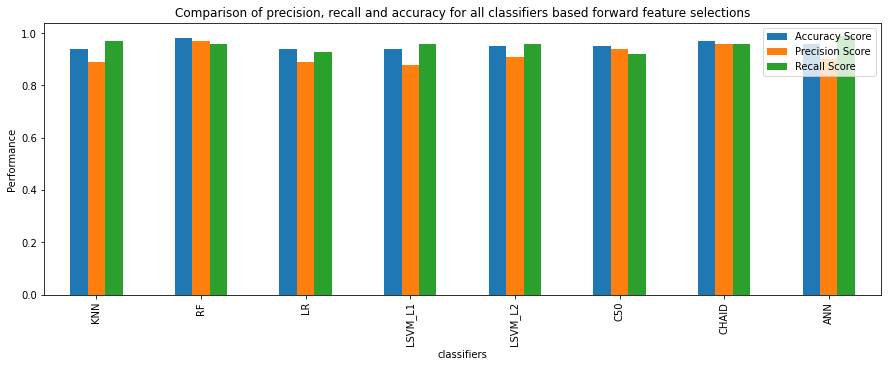

In [67]:
Metrics_sfs.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers based forward feature selections')

<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers with forward feature selection'}, xlabel='classifiers', ylabel='Performance of F1 score'>

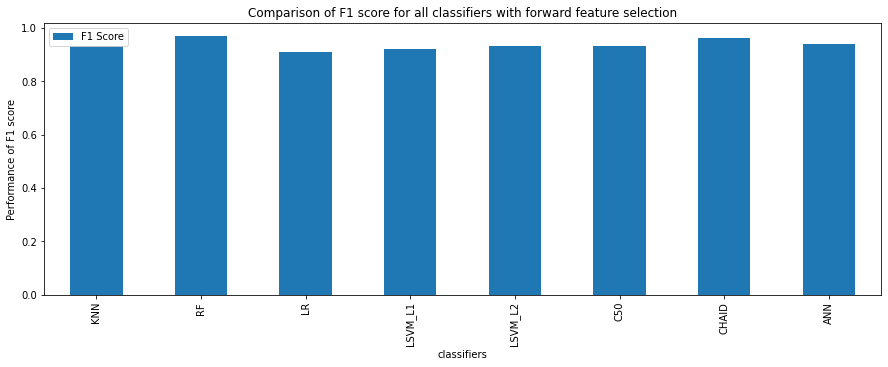

In [68]:

Metrics_sfs.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers with forward feature selection')


Text(0, 0.5, 'AUC')

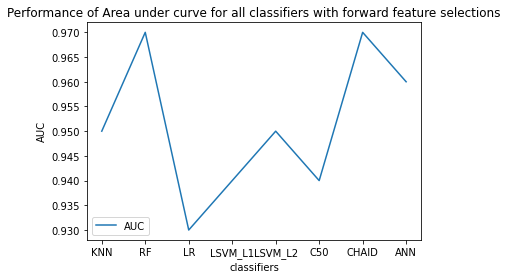

In [70]:
sns.lineplot(data=Metrics_sfs.transpose()['AUC'],label='AUC')
plt.title('Performance of Area under curve for all classifiers with forward feature selections')
plt.xlabel('classifiers')
plt.ylabel('AUC')

Text(0, 0.5, 'GINI Index')

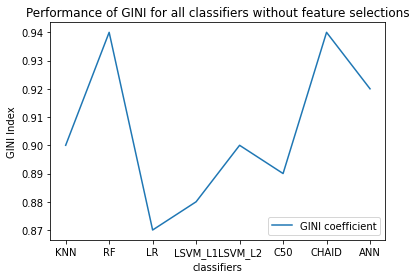

In [71]:
sns.lineplot(data=Metrics_sfs.transpose()['GINI'],label='GINI coefficient')
plt.title('Performance of GINI for all classifiers without feature selections')
plt.xlabel('classifiers')
plt.ylabel('GINI Index')

# Correlation Based Feature Selection

In [72]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [88]:
corr_features = correlation(X, 0.521)
corr_features

{'bgr', 'dm', 'htn', 'pc', 'pcv', 'sc'}

In [89]:
X=df[corr_features]
y=df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_train.shape, X_test.shape

((200, 6), (200, 6))

In [90]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train,y_train,X_test,y_test):
    knn = KNeighborsClassifier( algorithm='ball_tree',leaf_size=25,n_neighbors= 5,p= 2,weights='uniform')
    knn.fit(X_train,y_train)
    Y_pred_knn = knn.predict(X_test)
#accuracy_score(y_test, preds)

    cm=confusion_matrix(y_test,Y_pred_knn)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
    disp.plot()
    plt.show()

    metric=Evaluate(y_test,Y_pred_knn)
    return metric


In [91]:
from sklearn.ensemble import RandomForestClassifier

def RF(X_train,y_train,X_test,y_test):
    rd_clf = RandomForestClassifier()
    rd_clf.fit(X_train, y_train)
    Y_pred_rf=rd_clf.predict(X_test)
    print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")
    cm=confusion_matrix(y_test,Y_pred_rf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rd_clf.classes_)
    disp.plot()
    plt.show()
    metric=Evaluate(y_test,Y_pred_rf)
    return metric


from sklearn.linear_model import LogisticRegression

def LR(X_train,y_train,X_test,y_test):
    logreg = LogisticRegression(max_iter=10000)
    logreg.fit(X_train,y_train)
    Y_pred_lr=logreg.predict(X_test)

    print(f"Classification Report :- \n {classification_report(y_test, logreg.predict(X_test))}")
    cm=confusion_matrix(y_test,Y_pred_lr)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
    disp.plot()
    plt.show()
    log_acc=accuracy_score(Y_pred_lr,y_test)*100

    metric=Evaluate(y_test,Y_pred_lr)
    return metric

def LSVM_L2(X_train,y_train,X_test,y_test):
    LSVM_L2=LinearSVC(penalty='l2',max_iter=100000)
    LSVM_L2.fit(X_train,y_train)
    Y_pred_l2 = LSVM_L2.predict(X_test)

    print(f"Classification Report :- \n {classification_report(y_test, LSVM_L2.predict(X_test))}")
    cm=confusion_matrix(y_test,Y_pred_lr)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LSVM_L2.classes_)
    disp.plot()
    plt.show()

    lsvm_l2_acc=accuracy_score(Y_pred_l2,y_test)*100
    LSVM_L2_metric=Evaluate(y_test,Y_pred_l2)
    return LSVM_L2_metric


def LSVM_L1(X_train,y_train,X_test,y_test):
    
    LSVM_L1=LinearSVC(penalty='l1',loss="squared_hinge", dual=False, tol=1e-3)
    LSVM_L1.fit(X_train,y_train)


    Y_pred_l1 = LSVM_L1.predict(X_test)
    print(f"Classification Report :- \n {classification_report(y_test, LSVM_L1.predict(X_test))}")
    cm=confusion_matrix(y_test,Y_pred_lr)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LSVM_L1.classes_)
    disp.plot()
    plt.show()
    LSVM_L1_metric=Evaluate(y_test,Y_pred_l1)
    return LSVM_L1_metric




def C50(X_train,y_train,X_test,y_test):
    dt=DecisionTreeClassifier(criterion='entropy')
    dt.fit(X_train,y_train)
    Y_pred_dt=dt.predict(X_test)
    print(f"Classification Report :- \n {classification_report(y_test, dt.predict(X_test))}")

    cm=confusion_matrix(y_test,Y_pred_lr)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
    disp.plot()
    plt.show()
    C50_metric=Evaluate(y_test,Y_pred_dt)
    return C50_metric


def ANN(X_train,y_train,X_test,y_test,inp_dim):
    
    model_S = Sequential()
    model_S.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = inp_dim))
    model_S.add(Dropout(rate = 0.1))

# Adding the second hidden layer
    model_S.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    model_S.add(Dropout(rate = 0.1))

# Adding the third hidden layer
    model_S.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    model_S.add(Dropout(rate = 0.1))


# Adding the output layer
    model_S.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
    model_S.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    model_S.summary()

    history = model_S.fit(X_train,y_train,epochs=250,batch_size=10,verbose=2,validation_split=0.5)

    yp = model_S.predict(X_test)
    y_pred = []
    for element in yp:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    cm=confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
    disp.plot()
    plt.show()
    Ann=Evaluate(y_test,y_pred)
    return Ann


def CHAID(df_train,X_test,y_test):
    
    config = {"algorithm": "CHAID"}
    tree = cb.fit(df_train,config,target_label='classification')
    y_pred=[]
    c=0

    for i in y_test:
        x1=cb.predict(tree,X_test.iloc[c])
        if x1 > 0.6:
            y_pred.append(1)
        else:
            y_pred.append(0)
        c=c+1
    print(classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    chaid_acc=accuracy_score(y_pred,y_test)*100
    Chaid_metric=Evaluate(y_test,y_pred)
    return Chaid_metric

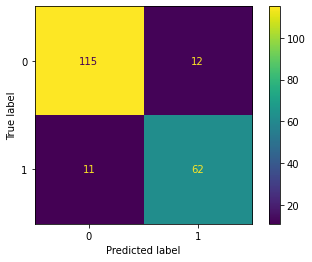

Accuracy Score : 88.50%
Precision Score : 83.78%
Recall Score : 84.93%
F1 Score : 84.35%
AUC :87.741344%
GINI :0.7548268795167725%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       127
           1       0.94      0.93      0.94        73

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



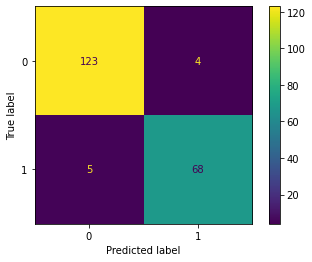

Accuracy Score : 95.50%
Precision Score : 94.44%
Recall Score : 93.15%
F1 Score : 93.79%
AUC :95.000539%
GINI :0.9000107863229425%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.91      0.93       127
           1       0.85      0.95      0.90        73

    accuracy                           0.92       200
   macro avg       0.91      0.93      0.92       200
weighted avg       0.92      0.92      0.92       200



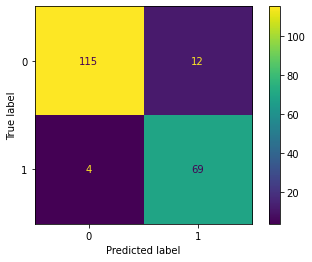

Accuracy Score : 92.00%
Precision Score : 85.19%
Recall Score : 94.52%
F1 Score : 89.61%
AUC :92.535865%
GINI :0.8507172904756768%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       127
           1       0.86      0.96      0.91        73

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.93      0.93      0.93       200



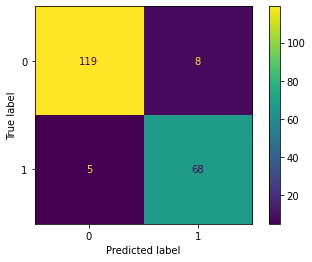

Accuracy Score : 93.00%
Precision Score : 86.42%
Recall Score : 95.89%
F1 Score : 90.91%
AUC :93.614497%
GINI :0.8722899363606946%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       127
           1       0.88      0.96      0.92        73

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



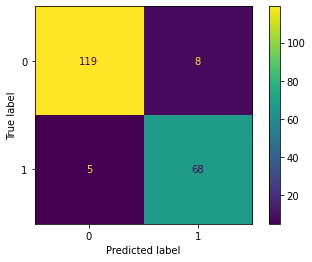

Accuracy Score : 93.50%
Precision Score : 87.50%
Recall Score : 95.89%
F1 Score : 91.50%
AUC :94.008198%
GINI :0.8801639521087259%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       127
           1       0.89      0.88      0.88        73

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.92      0.91       200



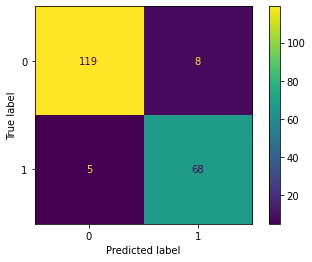

Accuracy Score : 91.50%
Precision Score : 88.89%
Recall Score : 87.67%
F1 Score : 88.28%
AUC :90.686010%
GINI :0.8137202027828712%
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                224       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 

Epoch 55/250
10/10 - 0s - loss: 0.3804 - accuracy: 0.8600 - val_loss: 0.2436 - val_accuracy: 0.9200 - 184ms/epoch - 18ms/step
Epoch 56/250
10/10 - 0s - loss: 0.3189 - accuracy: 0.8700 - val_loss: 0.2307 - val_accuracy: 0.9300 - 165ms/epoch - 16ms/step
Epoch 57/250
10/10 - 0s - loss: 0.3348 - accuracy: 0.8600 - val_loss: 0.2324 - val_accuracy: 0.9200 - 157ms/epoch - 16ms/step
Epoch 58/250
10/10 - 0s - loss: 0.3498 - accuracy: 0.8600 - val_loss: 0.2536 - val_accuracy: 0.9200 - 160ms/epoch - 16ms/step
Epoch 59/250
10/10 - 0s - loss: 0.3432 - accuracy: 0.8600 - val_loss: 0.2348 - val_accuracy: 0.9300 - 168ms/epoch - 17ms/step
Epoch 60/250
10/10 - 0s - loss: 0.2858 - accuracy: 0.9000 - val_loss: 0.2380 - val_accuracy: 0.9200 - 151ms/epoch - 15ms/step
Epoch 61/250
10/10 - 0s - loss: 0.2872 - accuracy: 0.8800 - val_loss: 0.2333 - val_accuracy: 0.9200 - 174ms/epoch - 17ms/step
Epoch 62/250
10/10 - 0s - loss: 0.3108 - accuracy: 0.8600 - val_loss: 0.2608 - val_accuracy: 0.9100 - 150ms/epoch - 15

Epoch 120/250
10/10 - 0s - loss: 0.2634 - accuracy: 0.9200 - val_loss: 0.2014 - val_accuracy: 0.9300 - 157ms/epoch - 16ms/step
Epoch 121/250
10/10 - 0s - loss: 0.2581 - accuracy: 0.8900 - val_loss: 0.2067 - val_accuracy: 0.9200 - 167ms/epoch - 17ms/step
Epoch 122/250
10/10 - 0s - loss: 0.2448 - accuracy: 0.9000 - val_loss: 0.2049 - val_accuracy: 0.9300 - 139ms/epoch - 14ms/step
Epoch 123/250
10/10 - 0s - loss: 0.2478 - accuracy: 0.9200 - val_loss: 0.2079 - val_accuracy: 0.9300 - 155ms/epoch - 15ms/step
Epoch 124/250
10/10 - 0s - loss: 0.2892 - accuracy: 0.9000 - val_loss: 0.2214 - val_accuracy: 0.9200 - 145ms/epoch - 14ms/step
Epoch 125/250
10/10 - 0s - loss: 0.2606 - accuracy: 0.9200 - val_loss: 0.2126 - val_accuracy: 0.9200 - 170ms/epoch - 17ms/step
Epoch 126/250
10/10 - 0s - loss: 0.2607 - accuracy: 0.9100 - val_loss: 0.2032 - val_accuracy: 0.9300 - 181ms/epoch - 18ms/step
Epoch 127/250
10/10 - 0s - loss: 0.2712 - accuracy: 0.8900 - val_loss: 0.2053 - val_accuracy: 0.9300 - 198ms/ep

Epoch 185/250
10/10 - 0s - loss: 0.2556 - accuracy: 0.9100 - val_loss: 0.1960 - val_accuracy: 0.9300 - 196ms/epoch - 20ms/step
Epoch 186/250
10/10 - 0s - loss: 0.2334 - accuracy: 0.9100 - val_loss: 0.2077 - val_accuracy: 0.9200 - 170ms/epoch - 17ms/step
Epoch 187/250
10/10 - 0s - loss: 0.2481 - accuracy: 0.9200 - val_loss: 0.2007 - val_accuracy: 0.9300 - 184ms/epoch - 18ms/step
Epoch 188/250
10/10 - 0s - loss: 0.2402 - accuracy: 0.9000 - val_loss: 0.2014 - val_accuracy: 0.9200 - 164ms/epoch - 16ms/step
Epoch 189/250
10/10 - 0s - loss: 0.2436 - accuracy: 0.9200 - val_loss: 0.1925 - val_accuracy: 0.9300 - 155ms/epoch - 15ms/step
Epoch 190/250
10/10 - 0s - loss: 0.2506 - accuracy: 0.8900 - val_loss: 0.2180 - val_accuracy: 0.9200 - 146ms/epoch - 15ms/step
Epoch 191/250
10/10 - 0s - loss: 0.2404 - accuracy: 0.9200 - val_loss: 0.2068 - val_accuracy: 0.9200 - 153ms/epoch - 15ms/step
Epoch 192/250
10/10 - 0s - loss: 0.2567 - accuracy: 0.9200 - val_loss: 0.2099 - val_accuracy: 0.9200 - 144ms/ep

Epoch 250/250
10/10 - 0s - loss: 0.2383 - accuracy: 0.9000 - val_loss: 0.1884 - val_accuracy: 0.9300 - 159ms/epoch - 16ms/step


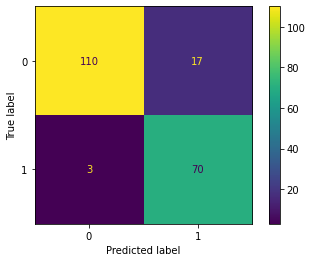

Accuracy Score : 90.00%
Precision Score : 80.46%
Recall Score : 95.89%
F1 Score : 87.50%
AUC :91.252292%
GINI :0.8250458418725055%


In [92]:
Knn_cfs_metric=KNN(X_train,y_train,X_test,y_test)
Rf_cfs_metric=RF(X_train,y_train,X_test,y_test)
Lr_cfs_metric=LR(X_train,y_train,X_test,y_test)
LSVM1_cfs_metric=LSVM_L1(X_train,y_train,X_test,y_test)
LSVM2_cfs_metric=LSVM_L2(X_train,y_train,X_test,y_test)
C50_cfs_metric=C50(X_train,y_train,X_test,y_test)
Ann_cfs_metric=ANN(X_train,y_train,X_test,y_test,6)


In [93]:
df_train=pd.concat([X_train,y_train],axis=1)

df_test=pd.concat([X_test,y_test],axis=1)

df_train

,sc,bgr,htn,dm,pcv,pc,classification
138,1.6,95.0,0,0,44.0,1,0
236,2.0,74.0,1,1,25.0,1,0
219,2.5,238.0,1,1,28.0,1,0
274,0.7,107.0,0,0,44.0,1,1
278,1.2,112.0,0,0,44.0,1,1
...,...,...,...,...,...,...,...
323,1.1,130.0,0,0,45.0,1,1
192,0.9,130.0,0,0,40.0,1,0
117,1.3,219.0,0,0,37.0,1,0
47,0.8,172.0,0,0,45.0,1,0


[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  10.976027250289917  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.0475
MSE:  0.04375
RMSE:  0.2091650066335189
RAE:  0.337099931231621
RRSE:  0.42985413225706864
Mean:  0.385
MAE / Mean:  12.337662337662337 %
RMSE / Mean:  54.32857315156335 %
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       127
           1       0.90      0.96      0.93        73

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



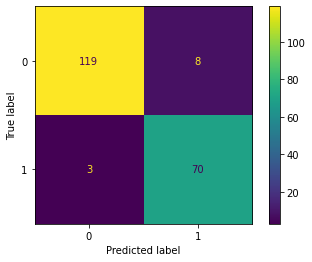

Accuracy Score : 94.50%
Precision Score : 89.74%
Recall Score : 95.89%
F1 Score : 92.72%
AUC :94.795599%
GINI :0.8959119836047889%


In [100]:
Chaid_cfs_metric=CHAID(df_train,X_test,y_test)

In [101]:
Metrics_cfs=pd.DataFrame({
                     'KNN':Knn_cfs_metric,
                       'RF':Rf_cfs_metric,
                       'LR':Lr_cfs_metric,
                      'LSVM_L1':LSVM1_cfs_metric,
                      'LSVM_L2':LSVM2_cfs_metric,
                      'C50':C50_cfs_metric,
                      'CHAID':Chaid_cfs_metric,
                      'ANN':Ann_cfs_metric
    
})

Metrics_cfs.head()

,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.88,0.96,0.92,0.93,0.94,0.92,0.94,0.90
Precision Score,0.84,0.94,0.85,0.86,0.88,0.89,0.90,0.80
Recall Score,0.85,0.93,0.95,0.96,0.96,0.88,0.96,0.96
F1 Score,0.84,0.94,0.90,0.91,0.92,0.88,0.93,0.88
AUC,0.88,0.95,0.93,0.94,0.94,0.91,0.95,0.91


<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers with correaltion based feature selection'}, xlabel='classifiers', ylabel='Performance of F1 score'>

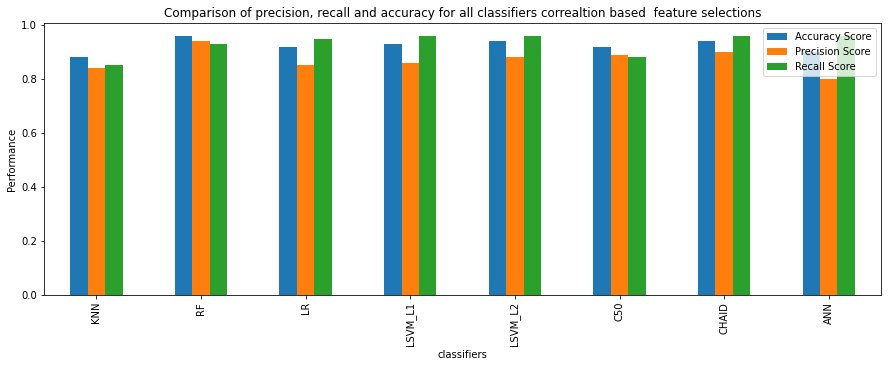

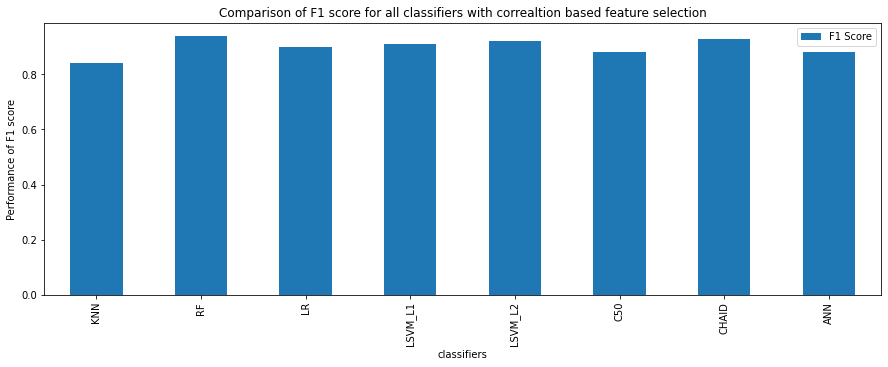

In [102]:
Metrics_cfs.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers correaltion based  feature selections')
Metrics_cfs.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers with correaltion based feature selection')



Text(0, 0.5, 'AUC')

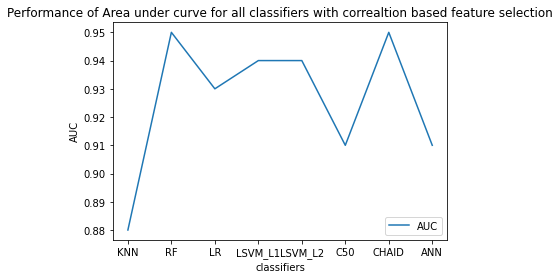

In [103]:
sns.lineplot(data=Metrics_cfs.transpose()['AUC'],label='AUC')
plt.title('Performance of Area under curve for all classifiers with correaltion based feature selection')
plt.xlabel('classifiers')
plt.ylabel('AUC')

Text(0, 0.5, 'GINI Index')

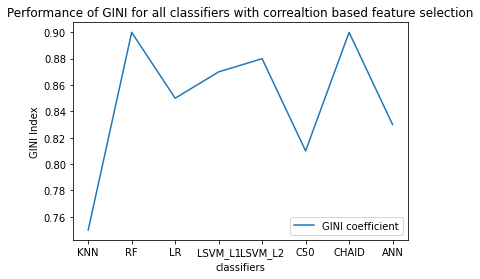

In [104]:
sns.lineplot(data=Metrics_cfs.transpose()['GINI'],label='GINI coefficient')
plt.title('Performance of GINI for all classifiers with correaltion based feature selection')
plt.xlabel('classifiers')
plt.ylabel('GINI Index')

# Smote with full features

In [105]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res,y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [121]:
y_train_res


array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [107]:
len(y_train_res[y_train_res==0]),len(y_train_res[y_train_res==1])

(123, 123)

In [115]:
X_train=X_train_res
y_train=pd.DataFrame(y_train_res)

type(y_train)

pandas.core.frame.DataFrame

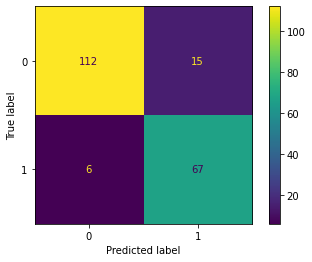

Accuracy Score : 89.50%
Precision Score : 81.71%
Recall Score : 91.78%
F1 Score : 86.45%
AUC :89.984899%
GINI :0.7996979829576099%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       127
           1       0.93      0.92      0.92        73

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



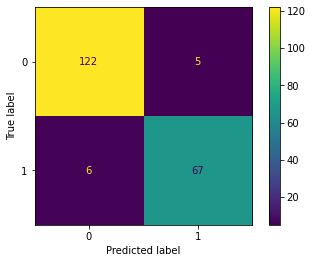

Accuracy Score : 94.50%
Precision Score : 93.06%
Recall Score : 91.78%
F1 Score : 92.41%
AUC :93.921907%
GINI :0.8784381404379247%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       127
           1       0.85      0.96      0.90        73

    accuracy                           0.93       200
   macro avg       0.91      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



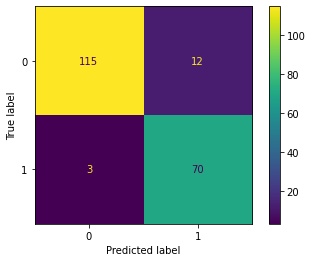

Accuracy Score : 92.50%
Precision Score : 85.37%
Recall Score : 95.89%
F1 Score : 90.32%
AUC :93.220796%
GINI :0.8644159206126629%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       127
           1       0.87      0.97      0.92        73

    accuracy                           0.94       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



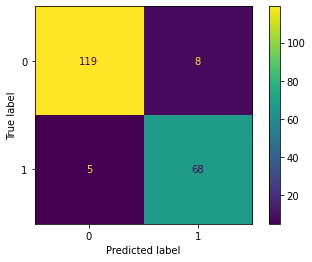

Accuracy Score : 93.50%
Precision Score : 86.59%
Recall Score : 97.26%
F1 Score : 91.61%
AUC :94.299428%
GINI :0.885988566497681%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       127
           1       0.86      0.96      0.91        73

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.93      0.93      0.93       200



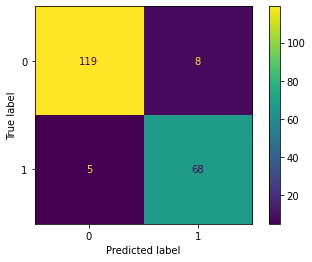

Accuracy Score : 93.00%
Precision Score : 86.42%
Recall Score : 95.89%
F1 Score : 90.91%
AUC :93.614497%
GINI :0.8722899363606946%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       127
           1       0.91      0.86      0.89        73

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200



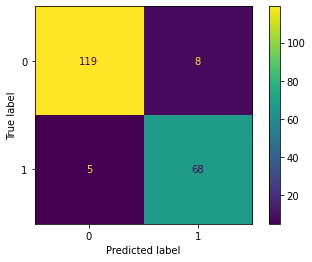

Accuracy Score : 92.00%
Precision Score : 91.30%
Recall Score : 86.30%
F1 Score : 88.73%
AUC :90.788480%
GINI :0.815769604141948%
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                224       
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dropout_14 (Dropout)        (None, 8)                 0

Epoch 55/250
13/13 - 0s - loss: 0.3055 - accuracy: 0.8780 - val_loss: 0.2711 - val_accuracy: 0.9512 - 240ms/epoch - 18ms/step
Epoch 56/250
13/13 - 0s - loss: 0.3149 - accuracy: 0.8455 - val_loss: 0.2660 - val_accuracy: 0.9431 - 188ms/epoch - 14ms/step
Epoch 57/250
13/13 - 0s - loss: 0.3508 - accuracy: 0.8618 - val_loss: 0.2596 - val_accuracy: 0.9431 - 185ms/epoch - 14ms/step
Epoch 58/250
13/13 - 0s - loss: 0.2915 - accuracy: 0.8699 - val_loss: 0.2678 - val_accuracy: 0.9350 - 186ms/epoch - 14ms/step
Epoch 59/250
13/13 - 0s - loss: 0.3078 - accuracy: 0.8862 - val_loss: 0.2554 - val_accuracy: 0.9431 - 168ms/epoch - 13ms/step
Epoch 60/250
13/13 - 0s - loss: 0.2611 - accuracy: 0.8780 - val_loss: 0.2547 - val_accuracy: 0.9431 - 163ms/epoch - 13ms/step
Epoch 61/250
13/13 - 0s - loss: 0.3047 - accuracy: 0.8780 - val_loss: 0.2579 - val_accuracy: 0.9431 - 157ms/epoch - 12ms/step
Epoch 62/250
13/13 - 0s - loss: 0.3024 - accuracy: 0.8862 - val_loss: 0.2526 - val_accuracy: 0.9431 - 158ms/epoch - 12

Epoch 120/250
13/13 - 0s - loss: 0.2306 - accuracy: 0.9350 - val_loss: 0.2404 - val_accuracy: 0.9431 - 174ms/epoch - 13ms/step
Epoch 121/250
13/13 - 0s - loss: 0.2816 - accuracy: 0.8943 - val_loss: 0.2222 - val_accuracy: 0.9431 - 162ms/epoch - 12ms/step
Epoch 122/250
13/13 - 0s - loss: 0.2544 - accuracy: 0.9106 - val_loss: 0.2317 - val_accuracy: 0.9431 - 183ms/epoch - 14ms/step
Epoch 123/250
13/13 - 0s - loss: 0.2283 - accuracy: 0.9187 - val_loss: 0.2175 - val_accuracy: 0.9431 - 241ms/epoch - 19ms/step
Epoch 124/250
13/13 - 0s - loss: 0.2397 - accuracy: 0.9106 - val_loss: 0.2188 - val_accuracy: 0.9350 - 217ms/epoch - 17ms/step
Epoch 125/250
13/13 - 0s - loss: 0.2612 - accuracy: 0.9187 - val_loss: 0.2381 - val_accuracy: 0.9431 - 195ms/epoch - 15ms/step
Epoch 126/250
13/13 - 0s - loss: 0.2579 - accuracy: 0.9268 - val_loss: 0.2303 - val_accuracy: 0.9431 - 185ms/epoch - 14ms/step
Epoch 127/250
13/13 - 0s - loss: 0.2542 - accuracy: 0.9268 - val_loss: 0.2300 - val_accuracy: 0.9350 - 159ms/ep

Epoch 185/250
13/13 - 0s - loss: 0.2406 - accuracy: 0.9187 - val_loss: 0.2088 - val_accuracy: 0.9350 - 171ms/epoch - 13ms/step
Epoch 186/250
13/13 - 0s - loss: 0.2290 - accuracy: 0.9268 - val_loss: 0.2067 - val_accuracy: 0.9431 - 196ms/epoch - 15ms/step
Epoch 187/250
13/13 - 0s - loss: 0.2075 - accuracy: 0.9024 - val_loss: 0.2016 - val_accuracy: 0.9431 - 130ms/epoch - 10ms/step
Epoch 188/250
13/13 - 0s - loss: 0.2472 - accuracy: 0.9106 - val_loss: 0.2044 - val_accuracy: 0.9431 - 116ms/epoch - 9ms/step
Epoch 189/250
13/13 - 0s - loss: 0.2296 - accuracy: 0.9268 - val_loss: 0.2034 - val_accuracy: 0.9431 - 118ms/epoch - 9ms/step
Epoch 190/250
13/13 - 0s - loss: 0.2361 - accuracy: 0.9268 - val_loss: 0.2149 - val_accuracy: 0.9431 - 158ms/epoch - 12ms/step
Epoch 191/250
13/13 - 0s - loss: 0.2538 - accuracy: 0.9187 - val_loss: 0.2042 - val_accuracy: 0.9431 - 269ms/epoch - 21ms/step
Epoch 192/250
13/13 - 0s - loss: 0.2473 - accuracy: 0.9187 - val_loss: 0.2129 - val_accuracy: 0.9431 - 319ms/epoc

Epoch 250/250
13/13 - 0s - loss: 0.2285 - accuracy: 0.9187 - val_loss: 0.2168 - val_accuracy: 0.9431 - 321ms/epoch - 25ms/step


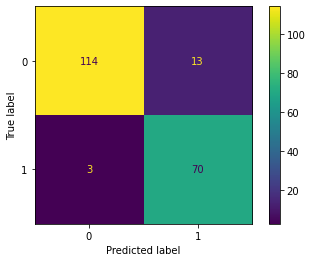

Accuracy Score : 92.00%
Precision Score : 84.34%
Recall Score : 95.89%
F1 Score : 89.74%
AUC :92.827095%
GINI :0.8565419048646314%


In [116]:
Knn_smote_metric=KNN(X_train,y_train,X_test,y_test)
Rf_smote_metric=RF(X_train,y_train,X_test,y_test)
Lr_smote_metric=LR(X_train,y_train,X_test,y_test)
LSVM1_smote_metric=LSVM_L1(X_train,y_train,X_test,y_test)
LSVM2_smote_metric=LSVM_L2(X_train,y_train,X_test,y_test)
C50_smote_metric=C50(X_train,y_train,X_test,y_test)
Ann_smote_metric=ANN(X_train,y_train,X_test,y_test,6)


[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  12.372902631759644  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.046747967479674794
MSE:  0.039634146341463415
RMSE:  0.19908326484529887
RAE:  0.28154625318573645
RRSE:  0.39816652969059774
Mean:  0.5
MAE / Mean:  9.34959349593496 %
RMSE / Mean:  39.816652969059774 %
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       127
           1       0.93      0.95      0.94        73

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200



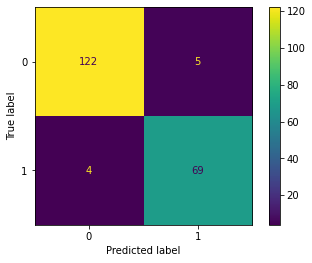

Accuracy Score : 95.50%
Precision Score : 93.24%
Recall Score : 94.52%
F1 Score : 93.88%
AUC :95.291770%
GINI :0.9058354007118972%


In [126]:
df_train=pd.concat([X_train,y_train],axis=1)

df_test=pd.concat([X_test,y_test],axis=1)

df_train.rename(columns={0:'classification'},inplace=True)
chaid_smote_metric=CHAID(df_train,X_test,y_test)


In [127]:
Metrics_smote=pd.DataFrame({
                     'KNN':Knn_smote_metric,
                       'RF':Rf_smote_metric,
                       'LR':Lr_smote_metric,
                      'LSVM_L1':LSVM1_smote_metric,
                      'LSVM_L2':LSVM2_smote_metric,
                      'C50':C50_smote_metric,
                      'CHAID':chaid_smote_metric,
                      'ANN':Ann_smote_metric
    
})

Metrics_smote.head()

,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.90,0.94,0.92,0.94,0.93,0.92,0.96,0.92
Precision Score,0.82,0.93,0.85,0.87,0.86,0.91,0.93,0.84
Recall Score,0.92,0.92,0.96,0.97,0.96,0.86,0.95,0.96
F1 Score,0.86,0.92,0.90,0.92,0.91,0.89,0.94,0.90
AUC,0.90,0.94,0.93,0.94,0.94,0.91,0.95,0.93


<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers using smote with all features'}, xlabel='classifiers', ylabel='Performance of F1 score'>

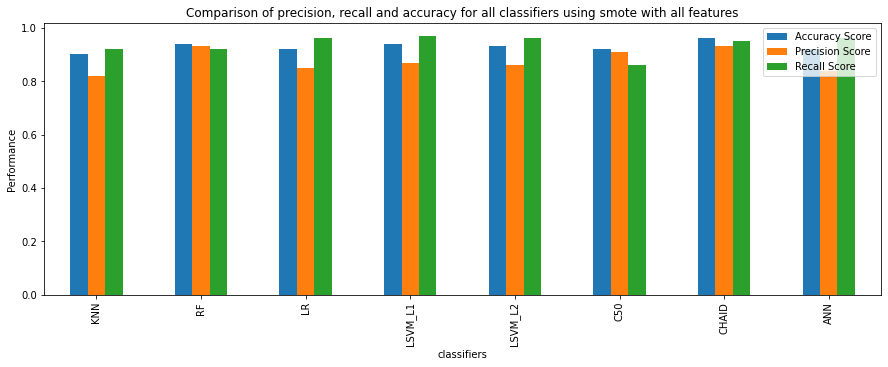

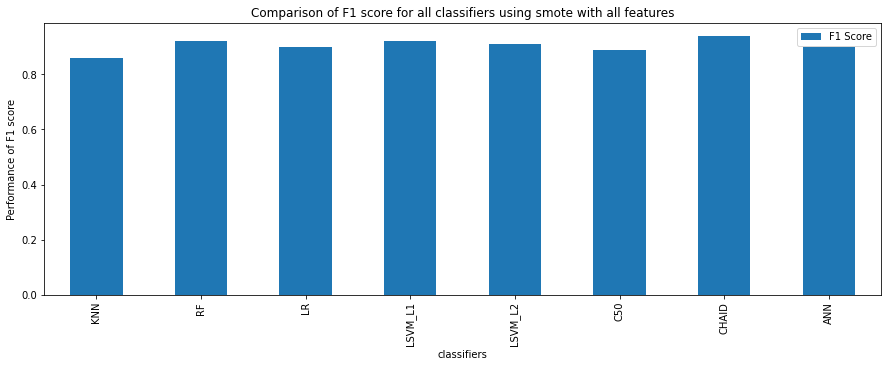

In [129]:
Metrics_smote.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers using smote with all features')
Metrics_smote.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers using smote with all features')



Text(0, 0.5, 'AUC')

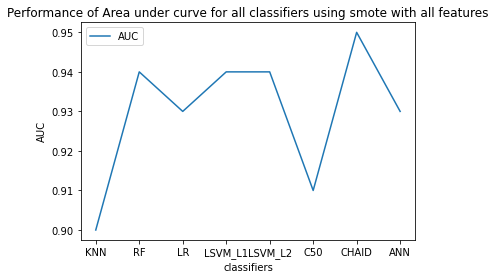

In [154]:
sns.lineplot(data=Metrics_smote.transpose()['AUC'],label='AUC')
plt.title('Performance of Area under curve for all classifiers using smote with all features')
plt.xlabel('classifiers')
plt.ylabel('AUC')

Text(0, 0.5, 'GINI index')

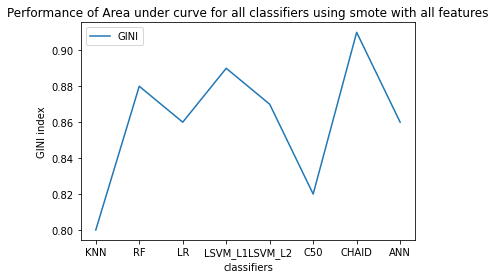

In [155]:
sns.lineplot(data=Metrics_smote.transpose()['GINI'],label='GINI')
plt.title('Performance of Area under curve for all classifiers using smote with all features')
plt.xlabel('classifiers')
plt.ylabel('GINI index')

# LASSO  Feature Selection

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [140]:
X=df.drop(['classification'], axis = 1)
y=df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,shuffle=True,random_state = 42)

In [141]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


In [142]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,20,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [143]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 199 candidates, totalling 995 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.108 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.079 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.071 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.099 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.074 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.142 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.132 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.123 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.162 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.123 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.203 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004

[CV 2/5] END .................model__alpha=2.1;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=2.1;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=2.1;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=2.1;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=2.2;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=2.2;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=2.2;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=2.2;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=2.2;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=2.3000000000000003;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=2.3000000000000003;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=2.3000000000000003;, score=-0.230 total time=   0.0s
[CV 4/5] END ..model__alpha=

[CV 4/5] END .................model__alpha=4.1;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=4.1;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=4.2;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=4.2;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=4.2;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=4.2;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=4.2;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=4.3;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=4.3;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=4.3;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=4.3;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=4.3;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=

[CV 5/5] END .................model__alpha=6.1;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=6.2;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=6.2;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=6.2;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=6.2;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=6.2;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=6.3;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=6.3;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=6.3;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=6.3;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=6.3;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=6.4;, score=-0.240 total time=   0.0s
[CV 2/5] END ...............

[CV 3/5] END .................model__alpha=8.2;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=8.2;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=8.2;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=8.3;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=8.3;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=8.3;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=8.3;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=8.3;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=8.4;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=8.4;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=8.4;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=8.4;, score=-0.269 total time=   0.0s
[CV 5/5] END ...............

[CV 4/5] END ................model__alpha=10.3;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=10.3;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=10.4;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=10.4;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=10.4;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=10.4;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=10.4;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=10.5;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=10.5;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=10.5;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=10.5;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=10.5;, score=-0.235 total time=   0.0s
[CV 1/5] END ...............

[CV 4/5] END ................model__alpha=12.5;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=12.5;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=12.6;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=12.6;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=12.6;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=12.6;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=12.6;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=12.700000000000001;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=12.700000000000001;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=12.700000000000001;, score=-0.230 total time=   0.0s
[CV 4/5] END ..model__alpha=12.700000000000001;, score=-0.269 total time=   0.0s
[CV 5/5] END ..model__alpha=12.700000000000001;, score=-0.235 total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END ................model__alpha=14.5;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=14.6;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=14.6;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=14.6;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=14.6;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=14.6;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=14.700000000000001;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=14.700000000000001;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=14.700000000000001;, score=-0.230 total time=   0.0s
[CV 4/5] END ..model__alpha=14.700000000000001;, score=-0.269 total time=   0.0s
[CV 5/5] END ..model__alpha=14.700000000000001;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=14.8;, score=-0.240 total time=   0.0s
[CV 2/5] END ...............

[CV 3/5] END ................model__alpha=16.6;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=16.6;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=16.6;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=16.700000000000003;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=16.700000000000003;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=16.700000000000003;, score=-0.230 total time=   0.0s
[CV 4/5] END ..model__alpha=16.700000000000003;, score=-0.269 total time=   0.0s
[CV 5/5] END ..model__alpha=16.700000000000003;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=16.8;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=16.8;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=16.8;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=16.8;, score=-0.269 total time=   0.0s
[CV 5/5] END ...............

[CV 5/5] END ..model__alpha=18.700000000000003;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=18.8;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=18.8;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=18.8;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=18.8;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=18.8;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=18.900000000000002;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=18.900000000000002;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=18.900000000000002;, score=-0.230 total time=   0.0s
[CV 4/5] END ..model__alpha=18.900000000000002;, score=-0.269 total time=   0.0s
[CV 5/5] END ..model__alpha=18.900000000000002;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=19.000000000000004;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5...
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4,
       15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4, 16.5,
       16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6,
       17.7, 17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7,
       18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8,
       19.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [144]:
search.best_params_

{'model__alpha': 0.1}

In [145]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [146]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.15494297, 0.05442763, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08907586,
       0.        , 0.        , 0.        , 0.02433123, 0.03911015,
       0.        , 0.        , 0.        , 0.        ])

In [147]:
features=[]
for i in X.columns:
    features.append(i)
print(features)

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [148]:
fea=np.array(features)[importance > 0]
fea

array(['sg', 'al', 'hemo', 'htn', 'dm'], dtype='<U5')

In [200]:
X=df[fea]

y=df['classification']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_train.shape, X_test.shape


((200, 5), (200, 5))

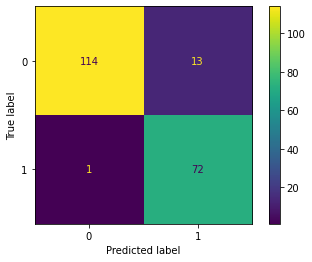

Accuracy Score : 93.00%
Precision Score : 84.71%
Recall Score : 98.63%
F1 Score : 91.14%
AUC :94.196958%
GINI :0.8839391651386042%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       127
           1       0.99      0.96      0.97        73

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



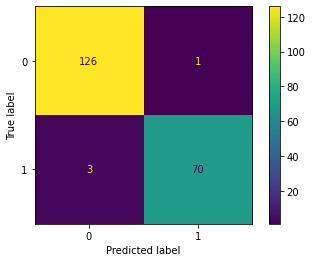

Accuracy Score : 98.00%
Precision Score : 98.59%
Recall Score : 95.89%
F1 Score : 97.22%
AUC :97.551505%
GINI :0.9510300938410094%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       127
           1       0.90      0.99      0.94        73

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



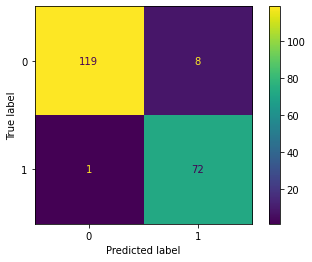

Accuracy Score : 95.50%
Precision Score : 90.00%
Recall Score : 98.63%
F1 Score : 94.12%
AUC :96.165462%
GINI :0.9233092438787616%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       127
           1       0.88      0.99      0.93        73

    accuracy                           0.94       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



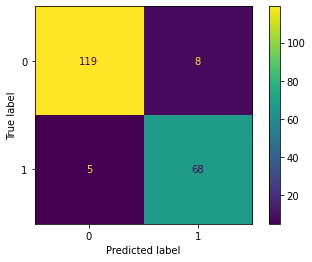

Accuracy Score : 94.50%
Precision Score : 87.80%
Recall Score : 98.63%
F1 Score : 92.90%
AUC :95.378061%
GINI :0.9075612123826988%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       127
           1       0.88      0.99      0.93        73

    accuracy                           0.94       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



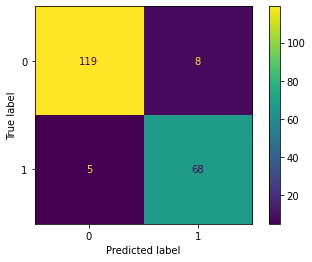

Accuracy Score : 94.50%
Precision Score : 87.80%
Recall Score : 98.63%
F1 Score : 92.90%
AUC :95.378061%
GINI :0.9075612123826988%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       127
           1       0.99      0.96      0.97        73

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



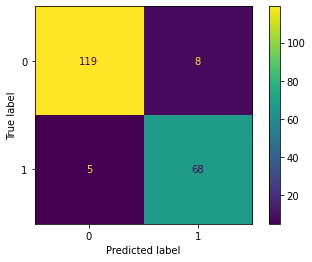

Accuracy Score : 98.00%
Precision Score : 98.59%
Recall Score : 95.89%
F1 Score : 97.22%
AUC :97.551505%
GINI :0.9510300938410094%
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                192       
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dropout_17 (Dropout)        (None, 8)                 

Epoch 55/250
10/10 - 0s - loss: 0.1396 - accuracy: 0.9500 - val_loss: 0.1889 - val_accuracy: 0.9300 - 282ms/epoch - 28ms/step
Epoch 56/250
10/10 - 0s - loss: 0.1638 - accuracy: 0.9400 - val_loss: 0.1924 - val_accuracy: 0.9300 - 251ms/epoch - 25ms/step
Epoch 57/250
10/10 - 0s - loss: 0.1434 - accuracy: 0.9500 - val_loss: 0.1753 - val_accuracy: 0.9300 - 241ms/epoch - 24ms/step
Epoch 58/250
10/10 - 0s - loss: 0.1458 - accuracy: 0.9300 - val_loss: 0.1797 - val_accuracy: 0.9300 - 231ms/epoch - 23ms/step
Epoch 59/250
10/10 - 0s - loss: 0.1267 - accuracy: 0.9600 - val_loss: 0.1813 - val_accuracy: 0.9300 - 256ms/epoch - 26ms/step
Epoch 60/250
10/10 - 0s - loss: 0.1314 - accuracy: 0.9600 - val_loss: 0.1764 - val_accuracy: 0.9300 - 188ms/epoch - 19ms/step
Epoch 61/250
10/10 - 0s - loss: 0.1398 - accuracy: 0.9700 - val_loss: 0.1832 - val_accuracy: 0.9300 - 170ms/epoch - 17ms/step
Epoch 62/250
10/10 - 0s - loss: 0.1348 - accuracy: 0.9400 - val_loss: 0.1873 - val_accuracy: 0.9300 - 163ms/epoch - 16

Epoch 120/250
10/10 - 0s - loss: 0.0862 - accuracy: 0.9700 - val_loss: 0.1658 - val_accuracy: 0.9300 - 153ms/epoch - 15ms/step
Epoch 121/250
10/10 - 0s - loss: 0.0824 - accuracy: 0.9900 - val_loss: 0.1688 - val_accuracy: 0.9300 - 139ms/epoch - 14ms/step
Epoch 122/250
10/10 - 0s - loss: 0.1099 - accuracy: 0.9700 - val_loss: 0.1681 - val_accuracy: 0.9300 - 136ms/epoch - 14ms/step
Epoch 123/250
10/10 - 0s - loss: 0.0715 - accuracy: 0.9900 - val_loss: 0.1924 - val_accuracy: 0.9300 - 146ms/epoch - 15ms/step
Epoch 124/250
10/10 - 0s - loss: 0.1045 - accuracy: 0.9600 - val_loss: 0.1639 - val_accuracy: 0.9400 - 147ms/epoch - 15ms/step
Epoch 125/250
10/10 - 0s - loss: 0.1297 - accuracy: 0.9600 - val_loss: 0.1716 - val_accuracy: 0.9300 - 172ms/epoch - 17ms/step
Epoch 126/250
10/10 - 0s - loss: 0.1034 - accuracy: 0.9800 - val_loss: 0.1631 - val_accuracy: 0.9500 - 181ms/epoch - 18ms/step
Epoch 127/250
10/10 - 0s - loss: 0.0837 - accuracy: 0.9900 - val_loss: 0.1817 - val_accuracy: 0.9200 - 157ms/ep

Epoch 185/250
10/10 - 0s - loss: 0.1023 - accuracy: 0.9700 - val_loss: 0.1964 - val_accuracy: 0.9300 - 180ms/epoch - 18ms/step
Epoch 186/250
10/10 - 0s - loss: 0.0948 - accuracy: 0.9800 - val_loss: 0.1944 - val_accuracy: 0.9300 - 151ms/epoch - 15ms/step
Epoch 187/250
10/10 - 0s - loss: 0.0725 - accuracy: 0.9700 - val_loss: 0.1723 - val_accuracy: 0.9500 - 129ms/epoch - 13ms/step
Epoch 188/250
10/10 - 0s - loss: 0.0818 - accuracy: 0.9800 - val_loss: 0.1870 - val_accuracy: 0.9300 - 141ms/epoch - 14ms/step
Epoch 189/250
10/10 - 0s - loss: 0.0853 - accuracy: 0.9700 - val_loss: 0.1823 - val_accuracy: 0.9300 - 146ms/epoch - 15ms/step
Epoch 190/250
10/10 - 0s - loss: 0.0816 - accuracy: 0.9900 - val_loss: 0.1777 - val_accuracy: 0.9400 - 146ms/epoch - 15ms/step
Epoch 191/250
10/10 - 0s - loss: 0.0595 - accuracy: 0.9900 - val_loss: 0.1787 - val_accuracy: 0.9500 - 155ms/epoch - 15ms/step
Epoch 192/250
10/10 - 0s - loss: 0.0668 - accuracy: 0.9900 - val_loss: 0.1845 - val_accuracy: 0.9300 - 193ms/ep

Epoch 250/250
10/10 - 0s - loss: 0.0782 - accuracy: 0.9800 - val_loss: 0.1925 - val_accuracy: 0.9500 - 158ms/epoch - 16ms/step


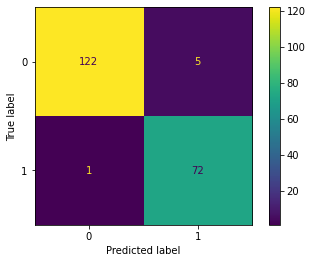

Accuracy Score : 97.00%
Precision Score : 93.51%
Recall Score : 98.63%
F1 Score : 96.00%
AUC :97.346565%
GINI :0.946931291122856%


In [151]:
Knn_lasso_metric=KNN(X_train,y_train,X_test,y_test)
Rf_lasso_metric=RF(X_train,y_train,X_test,y_test)
Lr_lasso_metric=LR(X_train,y_train,X_test,y_test)
LSVM1_lasso_metric=LSVM_L1(X_train,y_train,X_test,y_test)
LSVM2_lasso_metric=LSVM_L2(X_train,y_train,X_test,y_test)
C50_lasso_metric=C50(X_train,y_train,X_test,y_test)
Ann_lasso_metric=ANN(X_train,y_train,X_test,y_test,5)


In [152]:
df_train=pd.concat([X_train,y_train],axis=1)

df_test=pd.concat([X_test,y_test],axis=1)

df_train

,sg,al,hemo,htn,dm,classification
138,1.010,1.0,9.8,0,0,0
236,1.020,0.0,9.1,1,1,0
219,1.010,0.0,9.8,1,1,0
274,1.020,0.0,14.4,0,0,1
278,1.020,0.0,14.5,0,0,1
...,...,...,...,...,...,...
323,1.025,0.0,15.9,0,0,1
192,1.015,0.0,13.2,0,0,0
117,1.020,0.0,12.5,0,0,0
47,1.010,3.0,15.0,0,0,0


[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  10.502410411834717  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.01
MSE:  0.01
RMSE:  0.1
RAE:  0.16116459280507606
RRSE:  0.20550958268570346
Mean:  0.385
MAE / Mean:  2.5974025974025974 %
RMSE / Mean:  25.974025974025974 %
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       127
           1       0.99      0.96      0.97        73

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



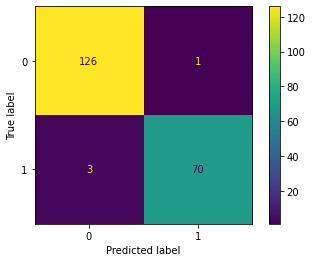

Accuracy Score : 98.00%
Precision Score : 98.59%
Recall Score : 95.89%
F1 Score : 97.22%
AUC :97.551505%
GINI :0.9510300938410094%


In [153]:
Chaid_lasso_metric=CHAID(df_train,X_test,y_test)

In [156]:
Metrics_lasso=pd.DataFrame({
                     'KNN':Knn_lasso_metric,
                       'RF':Rf_lasso_metric,
                       'LR':Lr_lasso_metric,
                      'LSVM_L1':LSVM1_lasso_metric,
                      'LSVM_L2':LSVM2_lasso_metric,
                      'C50':C50_lasso_metric,
                      'CHAID':Chaid_lasso_metric,
                      'ANN':Ann_lasso_metric
    
})

Metrics_lasso.head()

,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.93,0.98,0.96,0.94,0.94,0.98,0.98,0.97
Precision Score,0.85,0.99,0.90,0.88,0.88,0.99,0.99,0.94
Recall Score,0.99,0.96,0.99,0.99,0.99,0.96,0.96,0.99
F1 Score,0.91,0.97,0.94,0.93,0.93,0.97,0.97,0.96
AUC,0.94,0.98,0.96,0.95,0.95,0.98,0.98,0.97


<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers using lasso feturfe selection'}, xlabel='classifiers', ylabel='Performance of F1 score'>

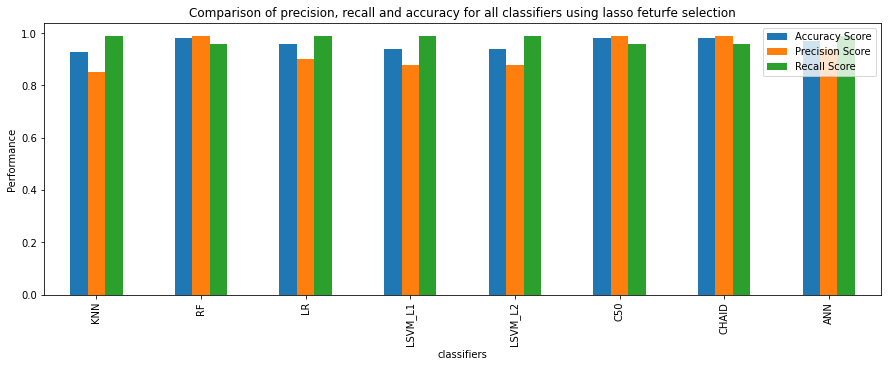

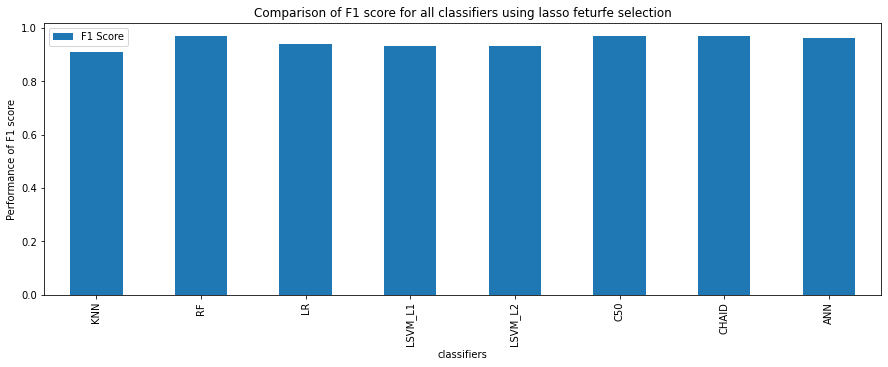

In [157]:
Metrics_lasso.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers using lasso feturfe selection')
Metrics_lasso.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers using lasso feturfe selection')



Text(0, 0.5, 'AUC')

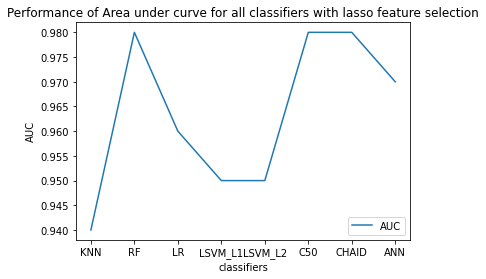

In [159]:
sns.lineplot(data=Metrics_lasso.transpose()['AUC'],label='AUC')
plt.title('Performance of Area under curve for all classifiers with lasso feature selection')
plt.xlabel('classifiers')
plt.ylabel('AUC')

Text(0, 0.5, 'GINI Index')

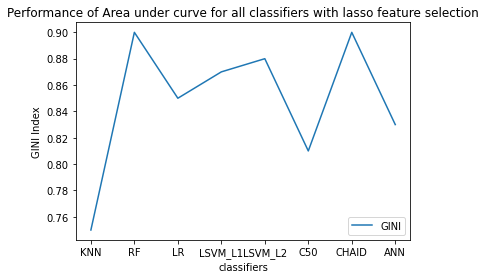

In [160]:
sns.lineplot(data=Metrics_cfs.transpose()['GINI'],label='GINI')
plt.title('Performance of Area under curve for all classifiers with lasso feature selection')
plt.xlabel('classifiers')
plt.ylabel('GINI Index')

# SMOTE with Selected Features

In [165]:
print(X)
print(y)

        sg   al  hemo  htn  dm
0    1.020  1.0  15.4    1   1
1    1.020  4.0  11.3    0   0
2    1.010  2.0   9.6    0   1
3    1.005  4.0  11.2    1   0
4    1.010  2.0  11.6    0   0
..     ...  ...   ...  ...  ..
395  1.020  0.0  15.7    0   0
396  1.025  0.0  16.5    0   0
397  1.020  0.0  15.8    0   0
398  1.025  0.0  14.2    0   0
399  1.025  0.0  15.8    0   0

[400 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int32


In [208]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res,y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [209]:
len(y_train_res)

246

In [210]:
len(y_train_res[y_train_res==0]),len(y_train_res[y_train_res==1])

(123, 123)

In [211]:
X_train=X_train_res
y_train=pd.DataFrame(y_train_res)

type(y_train)

pandas.core.frame.DataFrame

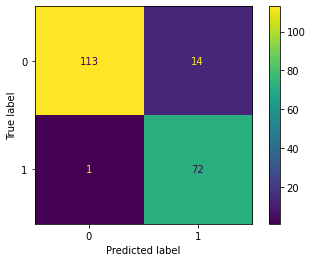

Accuracy Score : 92.50%
Precision Score : 83.72%
Recall Score : 98.63%
F1 Score : 90.57%
AUC :93.803257%
GINI :0.8760651493905725%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       127
           1       0.99      0.96      0.97        73

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



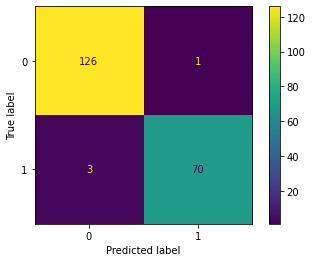

Accuracy Score : 98.00%
Precision Score : 98.59%
Recall Score : 95.89%
F1 Score : 97.22%
AUC :97.551505%
GINI :0.9510300938410094%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       127
           1       0.88      0.99      0.93        73

    accuracy                           0.94       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



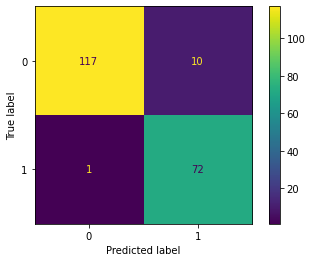

Accuracy Score : 94.50%
Precision Score : 87.80%
Recall Score : 98.63%
F1 Score : 92.90%
AUC :95.378061%
GINI :0.9075612123826988%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       127
           1       0.88      0.99      0.93        73

    accuracy                           0.94       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



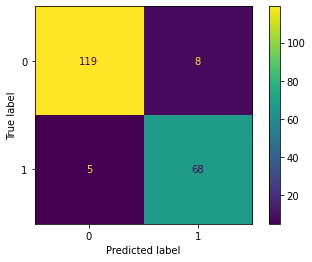

Accuracy Score : 94.50%
Precision Score : 87.80%
Recall Score : 98.63%
F1 Score : 92.90%
AUC :95.378061%
GINI :0.9075612123826988%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       127
           1       0.88      0.99      0.93        73

    accuracy                           0.94       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



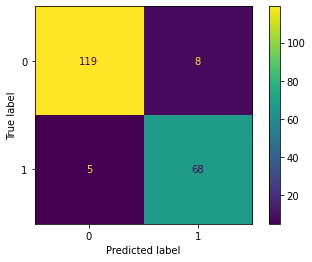

Accuracy Score : 94.50%
Precision Score : 87.80%
Recall Score : 98.63%
F1 Score : 92.90%
AUC :95.378061%
GINI :0.9075612123826988%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       127
           1       0.99      0.96      0.97        73

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



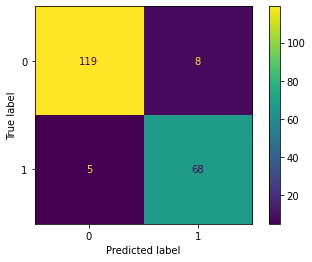

Accuracy Score : 98.00%
Precision Score : 98.59%
Recall Score : 95.89%
F1 Score : 97.22%
AUC :97.551505%
GINI :0.9510300938410094%
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                192       
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dropout_20 (Dropout)        (None, 8)                 

Epoch 55/250
13/13 - 0s - loss: 0.1368 - accuracy: 0.9512 - val_loss: 0.1597 - val_accuracy: 0.9512 - 216ms/epoch - 17ms/step
Epoch 56/250
13/13 - 0s - loss: 0.1420 - accuracy: 0.9593 - val_loss: 0.1596 - val_accuracy: 0.9512 - 288ms/epoch - 22ms/step
Epoch 57/250
13/13 - 0s - loss: 0.1371 - accuracy: 0.9431 - val_loss: 0.1568 - val_accuracy: 0.9512 - 367ms/epoch - 28ms/step
Epoch 58/250
13/13 - 0s - loss: 0.1646 - accuracy: 0.9431 - val_loss: 0.1574 - val_accuracy: 0.9512 - 376ms/epoch - 29ms/step
Epoch 59/250
13/13 - 0s - loss: 0.1187 - accuracy: 0.9675 - val_loss: 0.1629 - val_accuracy: 0.9431 - 300ms/epoch - 23ms/step
Epoch 60/250
13/13 - 0s - loss: 0.1382 - accuracy: 0.9593 - val_loss: 0.1556 - val_accuracy: 0.9512 - 203ms/epoch - 16ms/step
Epoch 61/250
13/13 - 0s - loss: 0.1502 - accuracy: 0.9593 - val_loss: 0.1580 - val_accuracy: 0.9512 - 166ms/epoch - 13ms/step
Epoch 62/250
13/13 - 0s - loss: 0.1061 - accuracy: 0.9512 - val_loss: 0.1549 - val_accuracy: 0.9512 - 167ms/epoch - 13

Epoch 120/250
13/13 - 0s - loss: 0.1584 - accuracy: 0.9431 - val_loss: 0.1666 - val_accuracy: 0.9512 - 402ms/epoch - 31ms/step
Epoch 121/250
13/13 - 0s - loss: 0.1413 - accuracy: 0.9512 - val_loss: 0.1646 - val_accuracy: 0.9512 - 482ms/epoch - 37ms/step
Epoch 122/250
13/13 - 0s - loss: 0.1344 - accuracy: 0.9512 - val_loss: 0.1695 - val_accuracy: 0.9431 - 456ms/epoch - 35ms/step
Epoch 123/250
13/13 - 0s - loss: 0.1027 - accuracy: 0.9756 - val_loss: 0.1571 - val_accuracy: 0.9512 - 454ms/epoch - 35ms/step
Epoch 124/250
13/13 - 1s - loss: 0.1322 - accuracy: 0.9512 - val_loss: 0.1538 - val_accuracy: 0.9431 - 505ms/epoch - 39ms/step
Epoch 125/250
13/13 - 0s - loss: 0.1130 - accuracy: 0.9756 - val_loss: 0.1567 - val_accuracy: 0.9431 - 395ms/epoch - 30ms/step
Epoch 126/250
13/13 - 0s - loss: 0.1041 - accuracy: 0.9756 - val_loss: 0.1570 - val_accuracy: 0.9431 - 406ms/epoch - 31ms/step
Epoch 127/250
13/13 - 1s - loss: 0.1322 - accuracy: 0.9512 - val_loss: 0.1525 - val_accuracy: 0.9431 - 543ms/ep

Epoch 185/250
13/13 - 0s - loss: 0.0630 - accuracy: 0.9837 - val_loss: 0.1778 - val_accuracy: 0.9431 - 296ms/epoch - 23ms/step
Epoch 186/250
13/13 - 0s - loss: 0.0507 - accuracy: 0.9919 - val_loss: 0.1619 - val_accuracy: 0.9593 - 260ms/epoch - 20ms/step
Epoch 187/250
13/13 - 0s - loss: 0.0669 - accuracy: 0.9919 - val_loss: 0.1795 - val_accuracy: 0.9431 - 266ms/epoch - 20ms/step
Epoch 188/250
13/13 - 0s - loss: 0.0630 - accuracy: 0.9837 - val_loss: 0.1678 - val_accuracy: 0.9512 - 270ms/epoch - 21ms/step
Epoch 189/250
13/13 - 0s - loss: 0.0569 - accuracy: 0.9919 - val_loss: 0.1639 - val_accuracy: 0.9593 - 285ms/epoch - 22ms/step
Epoch 190/250
13/13 - 0s - loss: 0.0646 - accuracy: 0.9919 - val_loss: 0.1684 - val_accuracy: 0.9593 - 411ms/epoch - 32ms/step
Epoch 191/250
13/13 - 0s - loss: 0.0544 - accuracy: 0.9919 - val_loss: 0.1686 - val_accuracy: 0.9593 - 250ms/epoch - 19ms/step
Epoch 192/250
13/13 - 0s - loss: 0.0445 - accuracy: 0.9837 - val_loss: 0.1760 - val_accuracy: 0.9431 - 239ms/ep

Epoch 250/250
13/13 - 0s - loss: 0.0618 - accuracy: 0.9919 - val_loss: 0.1644 - val_accuracy: 0.9593 - 200ms/epoch - 15ms/step


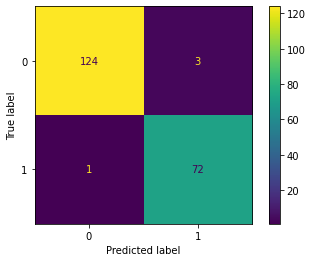

Accuracy Score : 98.00%
Precision Score : 96.00%
Recall Score : 98.63%
F1 Score : 97.30%
AUC :98.133966%
GINI :0.9626793226189192%


In [212]:
Knn_smote_lasso_metric=KNN(X_train,y_train,X_test,y_test)
Rf_smote_lasso_metric=RF(X_train,y_train,X_test,y_test)
Lr_smote_lasso_metric=LR(X_train,y_train,X_test,y_test)
LSVM1_smote_lasso_metric=LSVM_L1(X_train,y_train,X_test,y_test)
LSVM2_smote_lasso_metric=LSVM_L2(X_train,y_train,X_test,y_test)
C50_smote_lasso_metric=C50(X_train,y_train,X_test,y_test)
Ann_smote_lasso_metric=ANN(X_train,y_train,X_test,y_test,5)


In [214]:
df_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
df_train['classification']=y_train
df_train

,sg,al,hemo,htn,dm,classification
0,1.010000,1.0,9.800000,0,0,0
1,1.020000,0.0,9.100000,1,1,0
2,1.010000,0.0,9.800000,1,1,0
3,1.020000,0.0,14.400000,0,0,1
4,1.020000,0.0,14.500000,0,0,1
...,...,...,...,...,...,...
241,1.025000,0.0,17.186635,0,0,1
242,1.025000,0.0,13.448257,0,0,1
243,1.020578,0.0,17.488447,0,0,1
244,1.025000,0.0,17.044637,0,0,1


[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  11.208089113235474  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.012195121951219513
MSE:  0.012195121951219513
RMSE:  0.11043152607484655
RAE:  0.15617376188860604
RRSE:  0.2208630521496931
Mean:  0.5
MAE / Mean:  2.4390243902439024 %
RMSE / Mean:  22.08630521496931 %
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       127
           1       0.99      0.93      0.96        73

    accuracy                           0.97       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.97      0.97       200



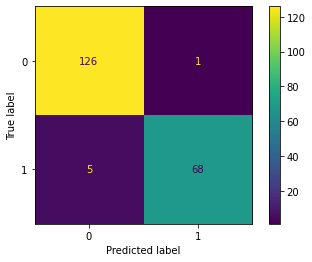

Accuracy Score : 97.00%
Precision Score : 98.55%
Recall Score : 93.15%
F1 Score : 95.77%
AUC :96.181642%
GINI :0.923632833567037%


In [215]:
Chaid_smote_lasso_metric=CHAID(df_train,X_test,y_test)

In [216]:
Metrics_smote_lasso=pd.DataFrame({
                     'KNN':Knn_smote_lasso_metric,
                       'RF':Rf_smote_lasso_metric,
                       'LR':Lr_smote_lasso_metric,
                      'LSVM_L1':LSVM1_smote_lasso_metric,
                      'LSVM_L2':LSVM2_smote_lasso_metric,
                      'C50':C50_smote_lasso_metric,
                      'CHAID':Chaid_smote_lasso_metric,
                      'ANN':Ann_smote_lasso_metric
    
})

Metrics_smote_lasso.head()

,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.92,0.98,0.94,0.94,0.94,0.98,0.97,0.98
Precision Score,0.84,0.99,0.88,0.88,0.88,0.99,0.99,0.96
Recall Score,0.99,0.96,0.99,0.99,0.99,0.96,0.93,0.99
F1 Score,0.91,0.97,0.93,0.93,0.93,0.97,0.96,0.97
AUC,0.94,0.98,0.95,0.95,0.95,0.98,0.96,0.98


<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers using smote with lasso feturfe selection'}, xlabel='classifiers', ylabel='Performance of F1 score'>

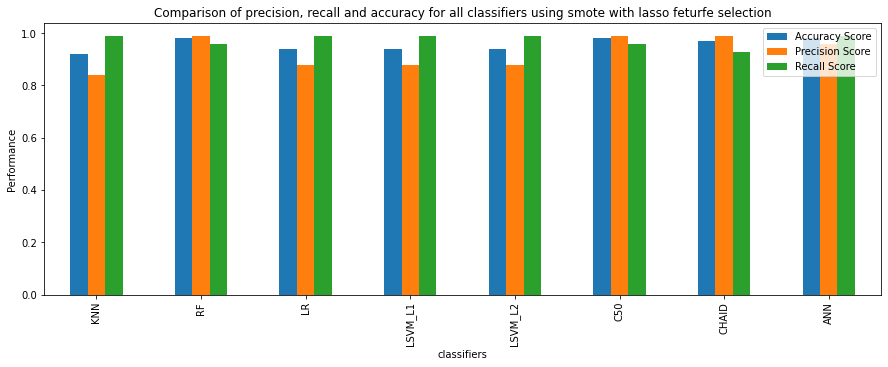

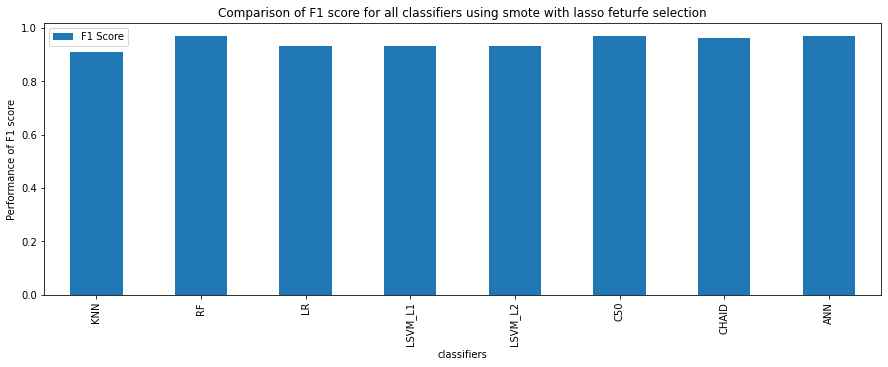

In [217]:
Metrics_smote_lasso.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers using smote with lasso feturfe selection')
Metrics_smote_lasso.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers using smote with lasso feturfe selection')



Text(0, 0.5, 'AUC')

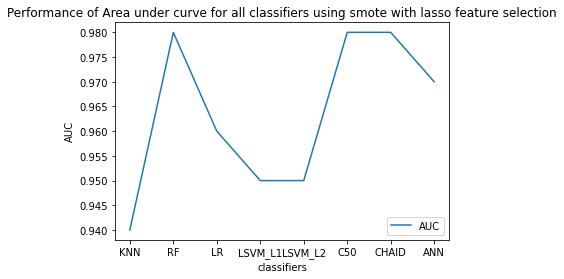

In [218]:
sns.lineplot(data=Metrics_lasso.transpose()['AUC'],label='AUC')
plt.title('Performance of Area under curve for all classifiers using smote with lasso feature selection')
plt.xlabel('classifiers')
plt.ylabel('AUC')

Text(0, 0.5, 'GINI Index')

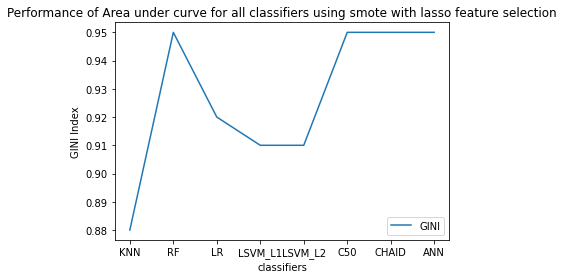

In [219]:
sns.lineplot(data=Metrics_lasso.transpose()['GINI'],label='GINI')
plt.title('Performance of Area under curve for all classifiers using smote with lasso feature selection')
plt.xlabel('classifiers')
plt.ylabel('GINI Index')